# Исследование влияния социальных сетей на ментальное здоровье

Автор: Аверкина Мария 

Дата: 01.2026

## Описание данных 

Этот набор данных отражает взаимосвязь между использованием социальных сетей, временем, проведенным за экраном, и такими факторами, как продолжительность сна и качество дальнейшего включения в повседневные задачи. Он полезен для анализа закономерностей, которые могут влиять на ментальное благополучие, цифровые привычки и поведенческие тенденции пользователей.

Данные содержат записи каждого пользователя с такими характеристиками, как ежедневное экранное время, время, проведенное в социальных сетях, позитивные и негативные взаимодействия, демографическая информация и часы сна.

Далее будет описание датасета, данного для исследования 

| Поле              | Описание                                       |
|-------------------|------------------------------------------------|
| `person_name`         |Имя или идентификатор пользователя.         |
| `age` | Возраст пользователя в годах.                |
| `date`             | Дата записи информации о пользователе.                          |
| `gender`          | Пол.                                |
| `platform`          | Основная платформа социальных сете, которую использует пользователей.                                        |
| `daily_screen_time_min`     | Общее экранное время в минутах.                             |
| `social_media_time_min`   | Общее время, проведенное в социальных сетях в минутах.                            |
| `negative_interactions_count`     | Количество негативного опыта, полученного онлайн.|
| `positive_interactions_count`    | Количество позитивного опыта, полученного онлайн. |
| `sleep_hours`    | Общее время сна в день в часах. |
| `physical_activity_min`     | Общее время физической активности в минутах.                             |
| `anxiety_level`   | Уровень тревоги.                            |
| `stress_level`     | Уровень стресса.|
| `mood_level`    | Уровень настроения. |
| `mental_state`    | Характеристика ментального состояния. |


## План работы
**Цель:** Исследовать взаимосвязь между временем в соцсетях, качеством сна, активностью и ментальным состоянием пользователей.

**Задачи:** 
1. Предобработка данных и анализ выбросов
2. Анализ пользователей в разрезе возраста, пола, платформы
3. Анализ цифровых привычек и ментального здоровья
4. Корреляционный анализ
5. Формирование выводов и рекомендаций

В работе будут упоминаться такие организации, как 'Instagram' (Meta), 'Snapchat', 'Facebook' (Meta), 'Twitter' (сейчас 'X'), которые **запрещены на территории Российской Федерации.** Заранее прописываю данный пункт, чтобы не возвращаться к нему после, так как работа ведется с большим объемом данных. 

## 1. Предобработка данных и анализ выбросов

In [1]:
# Импортируем необходимые библиотеки Python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import seaborn as sns
!pip install phik -q
from phik import phik_matrix
import matplotlib.colors as mcolors
# Импортируем датасет
df = pd.read_csv('/Users/mariaaverkina/Desktop/пет проекты/mental_health_social_media_dataset.csv')

zsh:1: command not found: pip


Далее познакомимся с данными. Выведем основную информацию, первые строки датафрейма и сделаем промежуточные итоги.

In [2]:
df.head()

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   object 
 1   age                          5000 non-null   int64  
 2   date                         5000 non-null   object 
 3   gender                       5000 non-null   object 
 4   platform                     5000 non-null   object 
 5   daily_screen_time_min        5000 non-null   int64  
 6   social_media_time_min        5000 non-null   int64  
 7   negative_interactions_count  5000 non-null   int64  
 8   positive_interactions_count  5000 non-null   int64  
 9   sleep_hours                  5000 non-null   float64
 10  physical_activity_min        5000 non-null   int64  
 11  anxiety_level                5000 non-null   int64  
 12  stress_level                 5000 non-null   int64  
 13  mood_level        

Промежуточные итоги:
 - Датасет содержит 15 столбцов и 5000 строк. Пропусков нет.
 - Столбцы `person_name`, `date`, `gender`, `platform`,  `mental_state` имеют тип данных `object`.     
- Столбцы `age`, `daily_screen_time_min`, `social_media_time_min`, `negative_interactions_count`, `positive_interactions_count`, `physical_activity_min`, `anxiety_level`, `stress_level`, `mood_level` имеют тип данных `int64`.
- Столбец `sleep_hours` имеет тип данных `float64`. 
- У столбцов с типами данных `int64` и `float64` можно понизить размерность для оптимизации хранения данных. 
- У столбца `date` поменяем тип данных с `object` на `datetime`, так как суть столбца - отражение даты события. 
- Проверим данные на явные и неявные дубликаты. 
- Проверим данные на выбросы. 


In [4]:
# Изменим размерность данных у столбцов с типом `int64` `float64`

columns = ['age', 'daily_screen_time_min', 'social_media_time_min', 'negative_interactions_count', 'positive_interactions_count', 'physical_activity_min', 'anxiety_level', 'stress_level', 'mood_level']

for column in df[columns]:
    df[column] = pd.to_numeric(df[column], downcast = 'integer')

df['sleep_hours'] = pd.to_numeric( df['sleep_hours'] , downcast = 'float')

display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   object 
 1   age                          5000 non-null   int8   
 2   date                         5000 non-null   object 
 3   gender                       5000 non-null   object 
 4   platform                     5000 non-null   object 
 5   daily_screen_time_min        5000 non-null   int16  
 6   social_media_time_min        5000 non-null   int16  
 7   negative_interactions_count  5000 non-null   int8   
 8   positive_interactions_count  5000 non-null   int8   
 9   sleep_hours                  5000 non-null   float32
 10  physical_activity_min        5000 non-null   int8   
 11  anxiety_level                5000 non-null   int8   
 12  stress_level                 5000 non-null   int8   
 13  mood_level        

None

In [5]:
# Далее изменим тип данных у столбца `date`

df['date'] = pd.to_datetime(df['date'])


In [6]:
# Далее проверим датасет на неявные дубликаты 


columns = ['age', 'gender', 'platform', 'anxiety_level', 'stress_level', 'mood_level', 'mental_state']

for column in df[columns]:
    display(f" Уникальные значение столбца {column}: {df[column].unique()}")


' Уникальные значение столбца age: [35 24 26 66 31 25 29 28 39 33 30 42 34 22 36 51 19 63 13 64 67 17 40 23\n 32 16 50 21 38 53 43 20 65 45 54 27 18 59 61 15 14 57 69 37 47 55 60 49\n 41 48 58 52 56 44 62 68 46]'

" Уникальные значение столбца gender: ['Male' 'Female' 'Other']"

" Уникальные значение столбца platform: ['Instagram' 'Snapchat' 'Facebook' 'WhatsApp' 'TikTok' 'YouTube' 'Twitter']"

' Уникальные значение столбца anxiety_level: [2 3 1 4]'

' Уникальные значение столбца stress_level: [7 8 6 5 9]'

' Уникальные значение столбца mood_level: [6 5 7 4]'

" Уникальные значение столбца mental_state: ['Stressed' 'Healthy' 'At_Risk']"

Промежуточные итоги:
- Аномальный значений в столбце `age`не наблюдается. 
- Столбец `gender` датафрейма содержит значения 'Male', 'Female', 'Other'. Далее удалим пользователей,  у которых в графе `gender` указано 'Other'. 
- Столбец `platform` датафрейма содержит значения 'Instagram', 'Snapchat', 'Facebook', 'WhatsApp', 'TikTok', 'YouTube', 'Twitter' (Запрещены на территории РФ). 
- Столбец `anxiety_level` датафрейма содержит значения 2, 3, 1, 4. 
- Столбец `stress_level` датафрейма содержит значения 7, 8, 6, 5, 9. 
- Столбец `mood_level` датафрейма содержит значения 6, 5, 7, 4. 
- Столбец `mental_state` датафрейма содержит значения Stressed, Healthy, At_Risk. 

По итогам анализа неявных дубликатов выявлено не было. Можно предположить, что `anxiety_level`, `stress_level`, `mood_level` оценивали по шкале от 1 до 10. 

In [7]:
display(f'Последняя запись информации о пользователе: {df['date'].max()}, первая запись записи информации о пользователе: {df['date'].min()}')

'Последняя запись информации о пользователе: 2025-11-16 00:00:00, первая запись записи информации о пользователе: 2024-01-01 00:00:00'

In [8]:
# Проверим датафрейм на количество уникальных значений и дубликаты

df.nunique()

person_name                    891
age                             57
date                           686
gender                           3
platform                         7
daily_screen_time_min          342
social_media_time_min          304
negative_interactions_count      3
positive_interactions_count      5
sleep_hours                     19
physical_activity_min           36
anxiety_level                    4
stress_level                     5
mood_level                       4
mental_state                     3
dtype: int64

In [9]:
display(f"Количество дубликатов по строке по столбцам 'person_name', 'age', 'gender' составило: {df.duplicated(subset =['person_name', 'age', 'gender'], keep = 'first').sum()}")
display(f"Количество полных дубликатов по строке составило: {df.duplicated( keep = 'first').sum()}")

"Количество дубликатов по строке по столбцам 'person_name', 'age', 'gender' составило: 198"

'Количество полных дубликатов по строке составило: 0'

- Можно заметить, что всего строк 5000, а уникальных имен пользователей 891. Так как полных дубликатов по строкам и всем столбцам не обнаружено, это значит, что пользователи могут пользоваться разными социальными сетями, например,  или иметь иные различие по другим столбцам, что в рамках нормы. 


In [10]:
# Удалим строки, у которых в столбце gender указано Other
count = df['person_name'].count()
deleted = df['person_name'][df['gender'] == 'Other'].count()
deleted_1 = deleted/ count*100
df = df[df['gender']!= 'Other']
display(f'Было строк: {count}, удалено строк: {deleted}, процент удаленных строк: {deleted_1}%, стало строк в датасете: {count - deleted}')

'Было строк: 5000, удалено строк: 99, процент удаленных строк: 1.9800000000000002%, стало строк в датасете: 4901'

- Мы удалили из датасета ~ 2% данных о пользователях с полом 'Other', так как непонятно как таких пользователей анализировать и к какому полу их отнести.
Далее изучим данные на выбросы. Для этого напишем функцию с описанием мер центральной тенденции, построим "ящик с усами" и гистограмму. 

In [11]:
# Напишем функцию по анализу выбросов столбцов
def diff(column):
    display(column.describe())

    plt.figure(figsize=(10,6))
    plt.boxplot(column, vert = False)
    plt.title(f'Распределение {column.name}')
    plt.show() 

    plt.figure(figsize=(12,6))
    plt.hist(column,  bins = 30, edgecolor = 'black', color = '#AED581')
    plt.axvline(x=column.mean(), linestyle='--', color='red', label = 'Среднее значение ')
    plt.title(f'Распределение {column.name}')
    plt.grid()
    plt.legend()
    plt.xlabel(f'Кол-во {column.name}')
    plt.ylabel('Частота')
    plt.show()
    display(f"99-й процентиль составил: {column.quantile(0.99)}, 95-й процентиль составил: {column.quantile(0.95)}")

count    4901.000000
mean       29.946542
std        12.279367
min        13.000000
25%        21.000000
50%        27.000000
75%        36.000000
max        69.000000
Name: age, dtype: float64

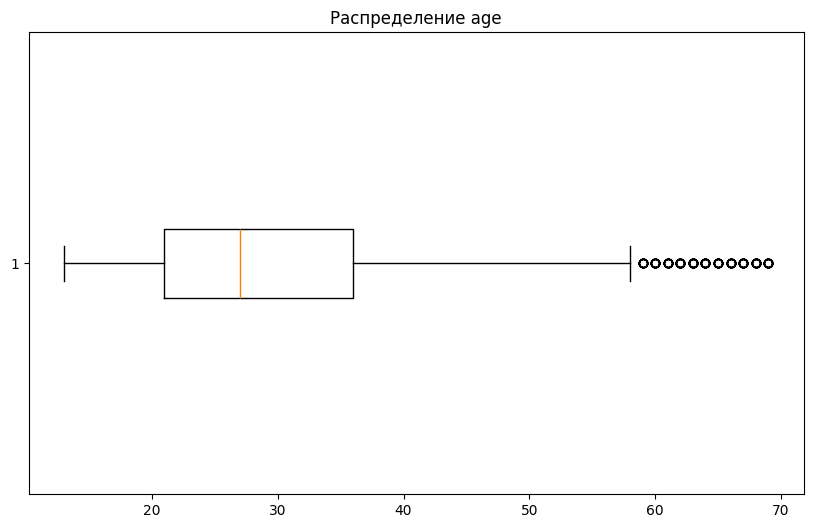

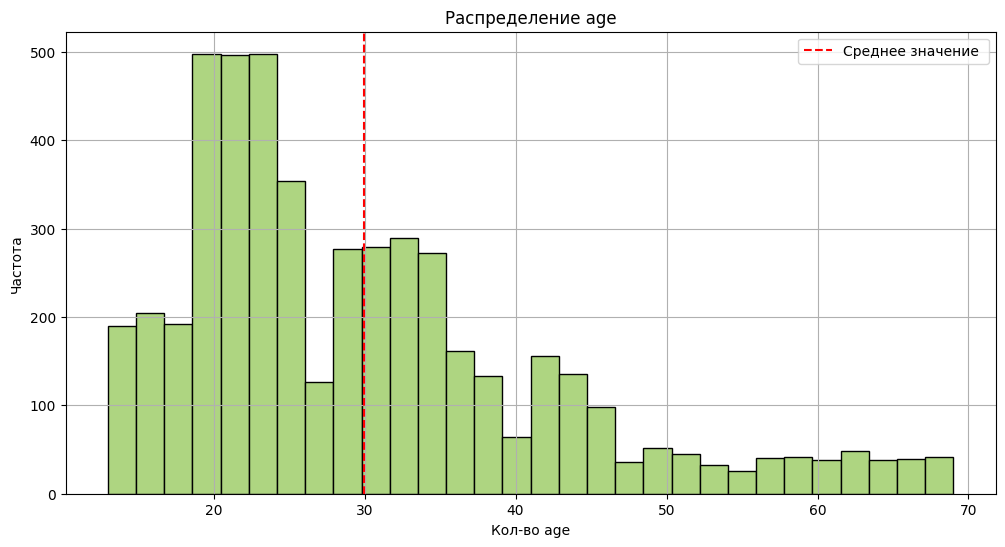

'99-й процентиль составил: 67.0, 95-й процентиль составил: 58.0'

In [12]:
# Проверим столбцы датафрейма на выбросы
diff (df['age'])

Промежуточные итоги: 
- Данные имеют левоассиметричное распределение - то есть больше пользователей в молодом возрасте. 
- Средний возраст составил 29 лет, медиана - 27 лет. Значения довольно близкие, что говорит об отсуствии аномалий. 
- Стандартное отклонение 12. 
- Минимальное значение составило 13 лет, максимальное - 69 лет. 
- Выбросов в данных нет, так как разница между медианой и средним арифметиеским небольшая, также стандартное отклонение не выходит за рамки нормы. 
- 99-й процентиль возраста пользователя составил: 67 лет, 95-й процентиль возраста пользователя составил: 58 лет

count    4901.000000
mean      373.140584
std       106.002736
min       140.000000
25%       280.000000
50%       389.000000
75%       461.000000
max       520.000000
Name: daily_screen_time_min, dtype: float64

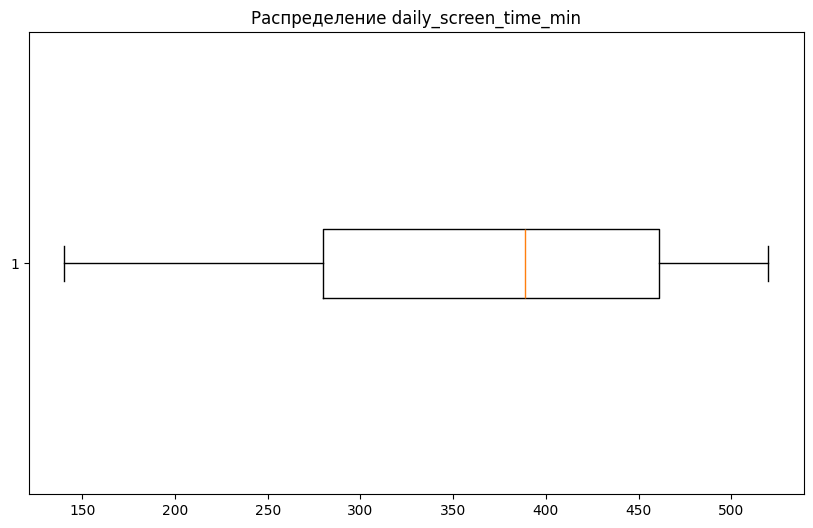

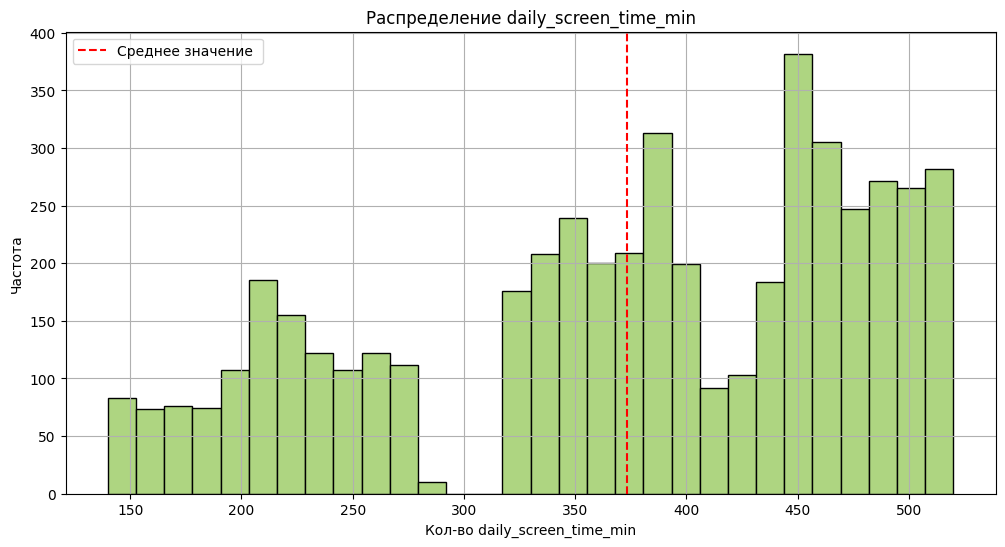

'99-й процентиль составил: 518.0, 95-й процентиль составил: 510.0'

In [13]:
diff (df['daily_screen_time_min']) 

Промежуточные итоги:
- Данные имеют правоассиметричное распределение - то есть больше пользователей проводят много времени в телефоне. 
- Среднее значение составило 373 мин, медиана - 389 мин. Разница небольшая (15 мин), в рамках нормы. 
- Минимальное значение составило 140 мин, максимальное - 520 мин. 
- Стандартное отклонение 106 мин. 
- Выбросов в данных нет, так как разница между медианой и среднем небольшая и стандартное отклонение находится в рамках нормы. 
- 99-й процентиль ежеднвеного экранного времени пользователя составил: 518 мин, 95-й процентиль ежеднвеного экранного времени пользователя составил: 510 мин. 

count    4901.000000
mean      175.355642
std        71.291281
min        35.000000
25%       118.000000
50%       170.000000
75%       231.000000
max       338.000000
Name: social_media_time_min, dtype: float64

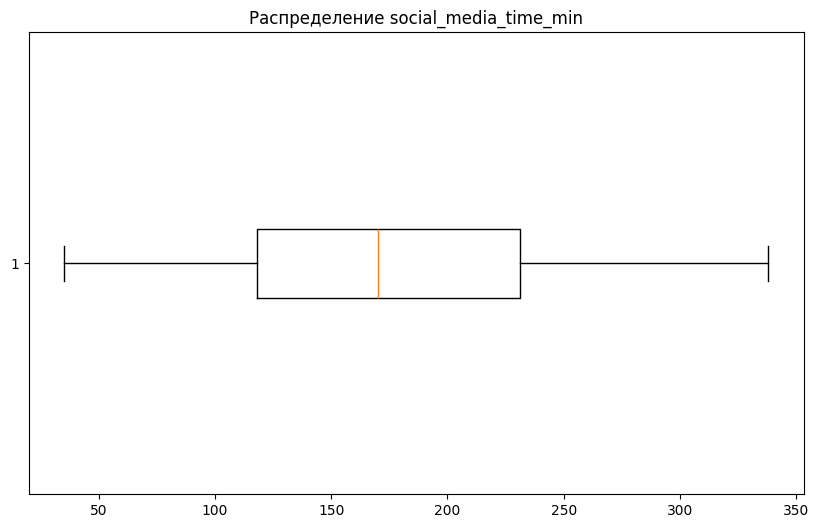

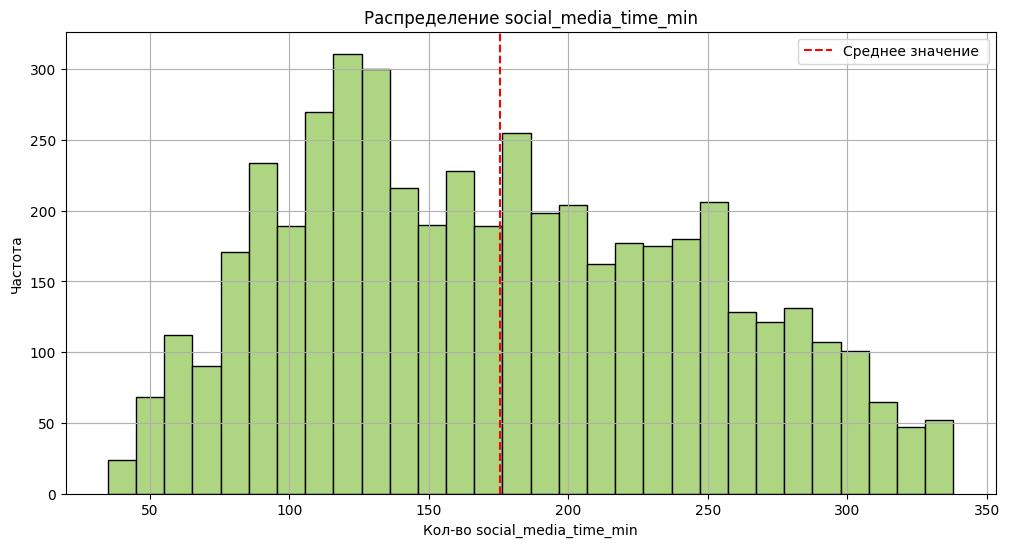

'99-й процентиль составил: 328.0, 95-й процентиль составил: 299.0'

In [14]:
diff (df['social_media_time_min'])


Промежуточные итоги:
- Данные не имеют смещенного распределения - то есть пользователи тратят среднее кол-во минут на социальные сети. 
- Среднее значение составило 175 мин, медиана - 170 мин. Разница небольшая (5 мин), в рамках нормы. 
- Минимальное значение составило 35 мин, максимальное - 338 мин. 
- Стандартное отклонение 71 мин. 
- Выбросов в данных нет, так как разница между медианой и среднем небольшая и стандартное отклонение находится в рамках нормы. 
- 99-й процентиль времени в социальных сетях пользователя составил: 328 мин, 95-й процентиль времени в социальных сетях пользователя составил: 299 мин. 

count    4901.000000
mean       22.683942
std        10.602362
min         8.000000
25%        14.000000
50%        21.000000
75%        32.000000
max        46.000000
Name: physical_activity_min, dtype: float64

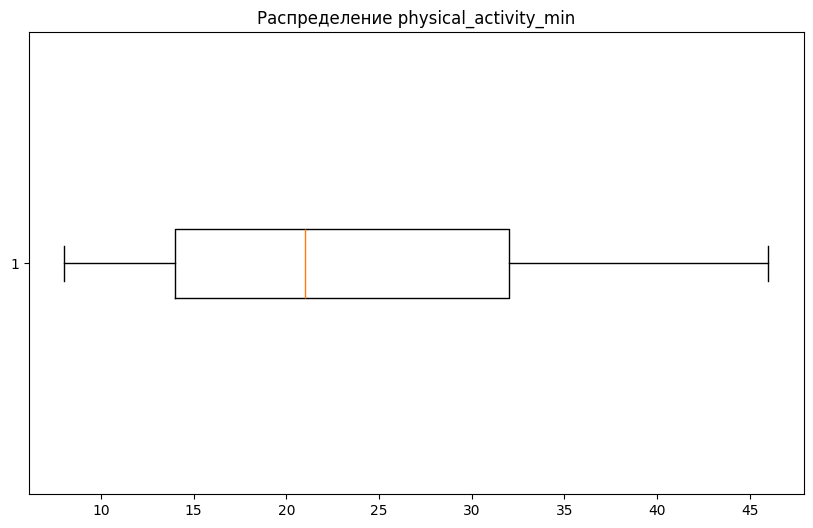

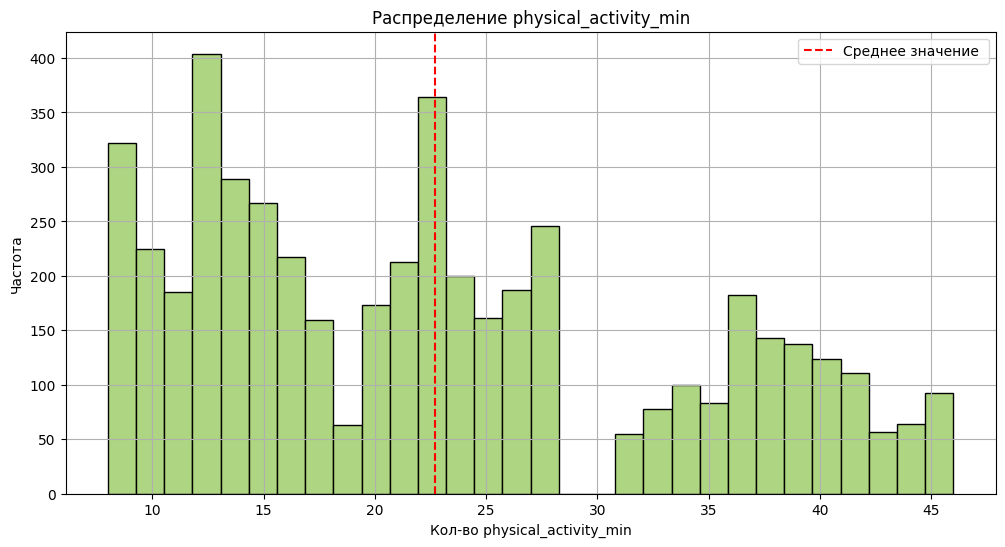

'99-й процентиль составил: 45.0, 95-й процентиль составил: 42.0'

In [15]:
diff (df['physical_activity_min'])


Промежуточные итоги:
- Данные имеют левоассиметричное распределение - то есть больше пользователей меньше времени уделяют физической активности. 
- Среднее значение составило 22.7 мин, медиана - 21 мин. Разница небольшая (1.7 мин), в рамках нормы. 
- Минимальное значение составило 8 мин, максимальное - 46 мин. 8 минут - странно маленькое время для физической активности, возможно в рамках данныого исследования к физической активности относят и короткие зарядки и разминки после долгого рабочего дня за компьютером. Будем считать, что 8 мин это нормально для короткой зарядки. 
- Стандартное отклонение 10.602862. 
- Выбросов в данных нет, так как разница между медианой и среднем небольшая и стандартное отклонение находится в рамках нормы. 
- 99-й процентиль составил: 45.0 мин, 95-й процентиль составил: 42.0 мин. 
В целом в данных не сказано, количество физической активности за какой период нам дано, но будем считать, что за день, как и все остальные временные показатели.

count    4901.000000
mean        7.134300
std         0.533239
min         6.400000
25%         6.700000
50%         7.100000
75%         7.600000
max         8.300000
Name: sleep_hours, dtype: float64

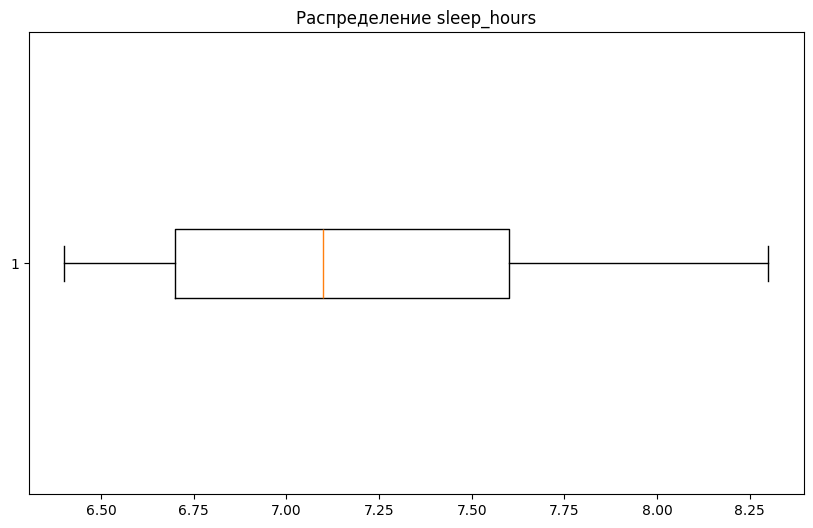

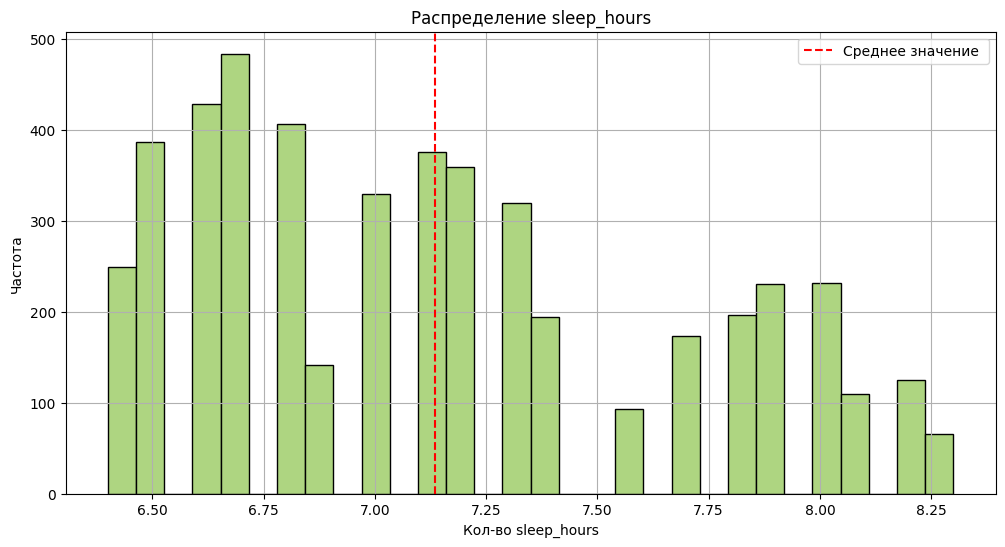

'99-й процентиль составил: 8.300000190734863, 95-й процентиль составил: 8.100000381469727'

In [16]:
diff (df['sleep_hours'])


Промежуточные итоги:
- Данные имеют левоассиметричное распределение - то есть больше пользователей спят меньшее количество часов. Это смещение не сильное и по гистаграмме можно заметить, что часы сна между пользователями распределены больше неравномерно, чем левоассимметрично. 
- Среднее значение составило  7.13 часа, медиана - 7.1 часа. Разницы практически нет, что является свидетельством отсутсвия выбросов. 
- Минимальное значение составило 6.4 часа, максимальное - 8.3 часа. 
- Стандартное отклонение 0.533184 часа, что мало и является признаком отсуствия выбросов. 
- Выбросов в данных нет. 
- 99-й процентиль общего времени сна в день составил: 8.300000190734863, 95-й процентиль общего времени сна в день составил: 8.100000381469727.

Давайте создадим дополнительный столбец, аналогичным `sleep_hours`, только он будет содержать время сна в день в минутах, чтобы было удобнее свравнивать время сна с остальными временными показателями (`daily_screen_time_min`, `social_media_time_min`,`physical_activity_min`), выраженными в минутах. 

In [17]:
df['sleep_min'] = df['sleep_hours'] * 60

count    4901.000000
mean        7.108549
std         1.063327
min         5.000000
25%         6.000000
50%         7.000000
75%         8.000000
max         9.000000
Name: stress_level, dtype: float64

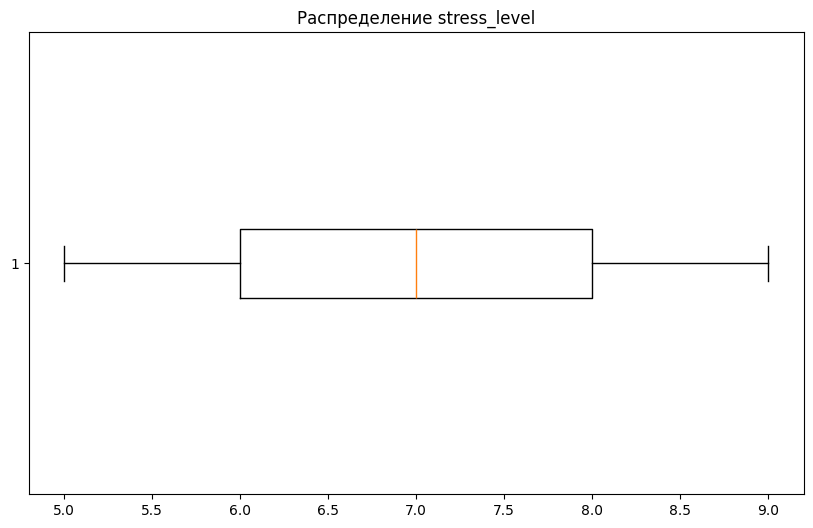

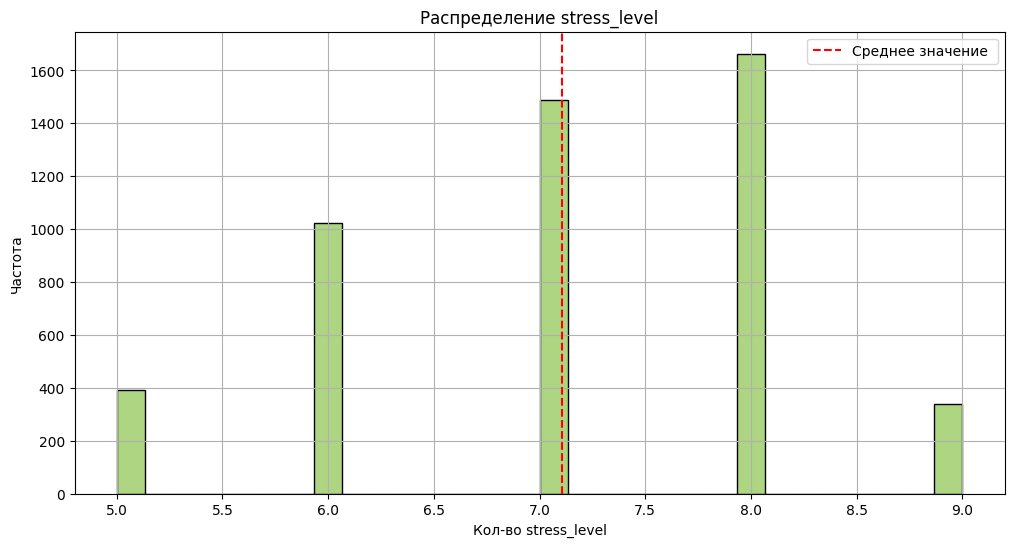

'99-й процентиль составил: 9.0, 95-й процентиль составил: 9.0'

In [18]:
diff (df['stress_level'])

Промежуточные итоги:
- Данные не имеют смещения. 
- Среднее значение составило  7.1 , медиана - 7. Разницы практически нет.
- Минимальное значение составило 5 , максимальное - 9. 
- Стандартное отклонение 1.063327.
- Выбросов в данных нет. 
- 99-й процентиль составил: 9.0, 95-й процентиль составил: 9.0.

Заметим, что присуствуют оценки только 5, 6, 7, 8, 9, Больше всего поставиили оценку 8. 

count    4901.000000
mean        2.510712
std         0.795996
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: anxiety_level, dtype: float64

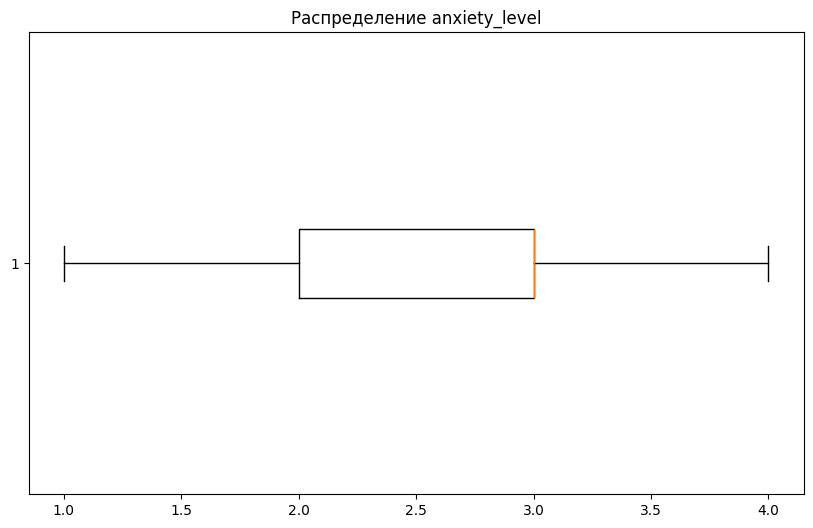

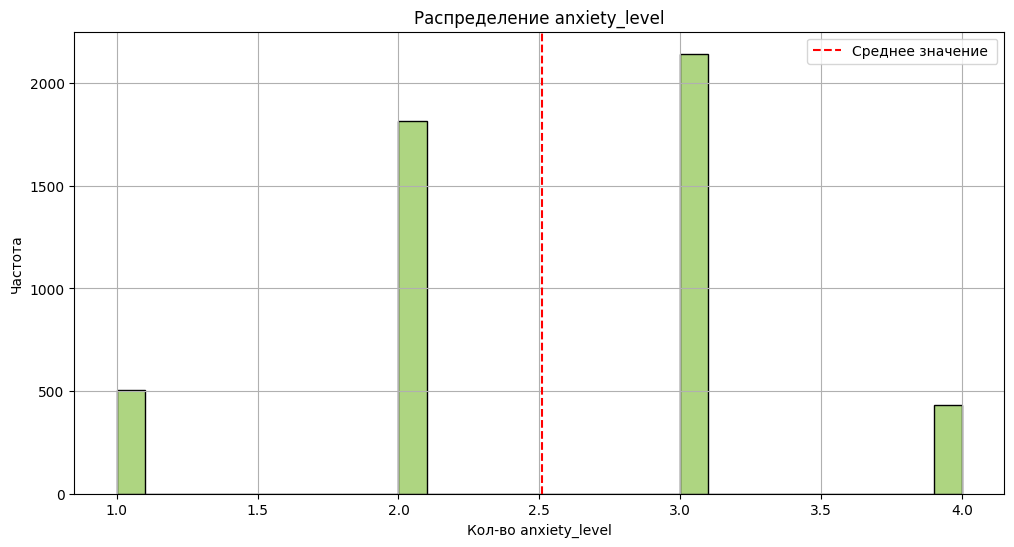

'99-й процентиль составил: 4.0, 95-й процентиль составил: 4.0'

In [19]:
diff (df['anxiety_level'])

Промежуточные итоги:
- Данные не имеют смещения. 
- Среднее значение составило  2.5 , медиана - 3. Разницы практически нет.
- Минимальное значение составило 1 , максимальное - 4. 
- Стандартное отклонение 0.795996.
- Выбросов в данных нет. 
- 99-й процентиль составил: 4.0, 95-й процентиль составил: 4.0.

Заметим, что присуствуют оценки только 1, 2, 3, 4. Больше всего поставиили оценку 3. 

count    4901.000000
mean        5.624974
std         0.760867
min         4.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         7.000000
Name: mood_level, dtype: float64

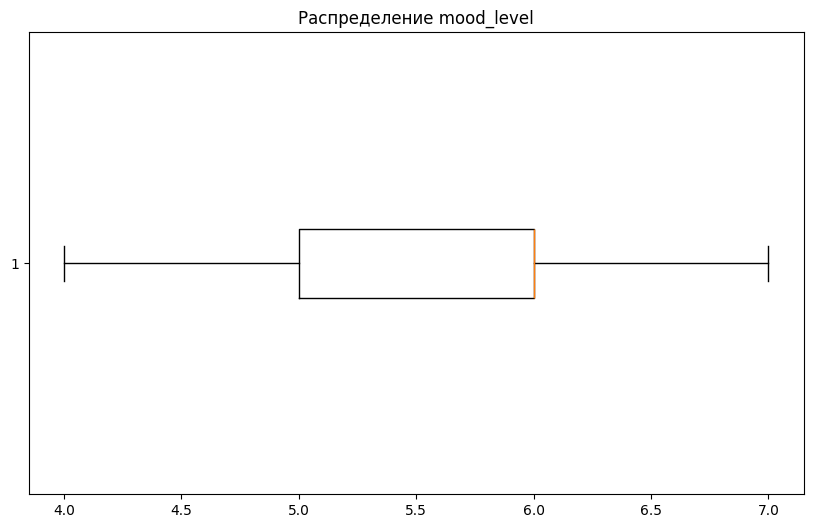

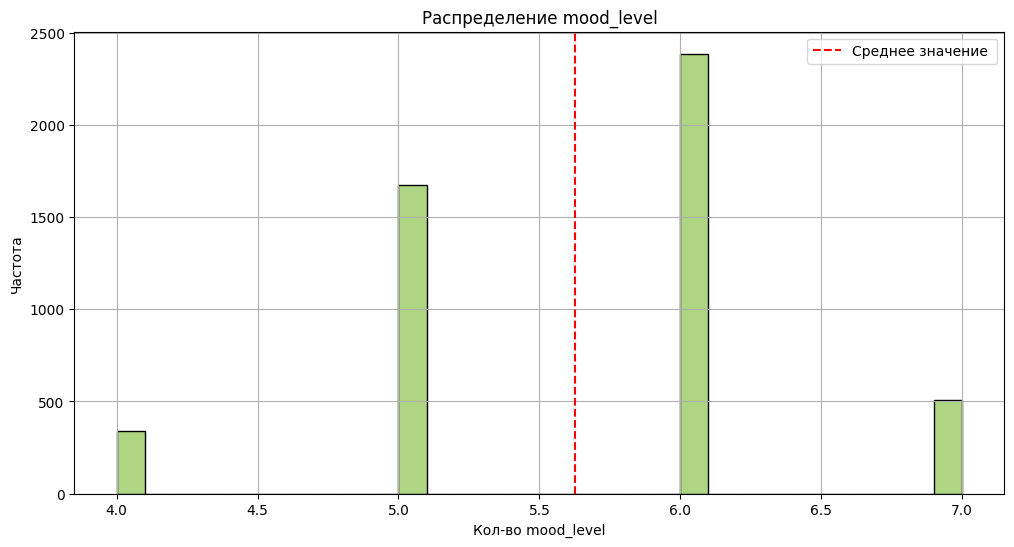

'99-й процентиль составил: 7.0, 95-й процентиль составил: 7.0'

In [20]:
diff (df['mood_level'])

Промежуточные итоги:
- Данные не имеют смещения. 
- Среднее значение составило    5.6 , медиана - 6. Разницы практически нет.
- Минимальное значение составило 4 , максимальное - 7. 
- Стандартное отклонение 0.760867.
- Выбросов в данных нет. 
- 99-й процентиль составил: 7.0, 95-й процентиль составил: 7.0

Заметим, что присуствуют оценки только 4, 5, 6, 7. Больше всего поставиили оценку 6. 

count    4901.000000
mean        1.837788
std         0.945024
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: positive_interactions_count, dtype: float64

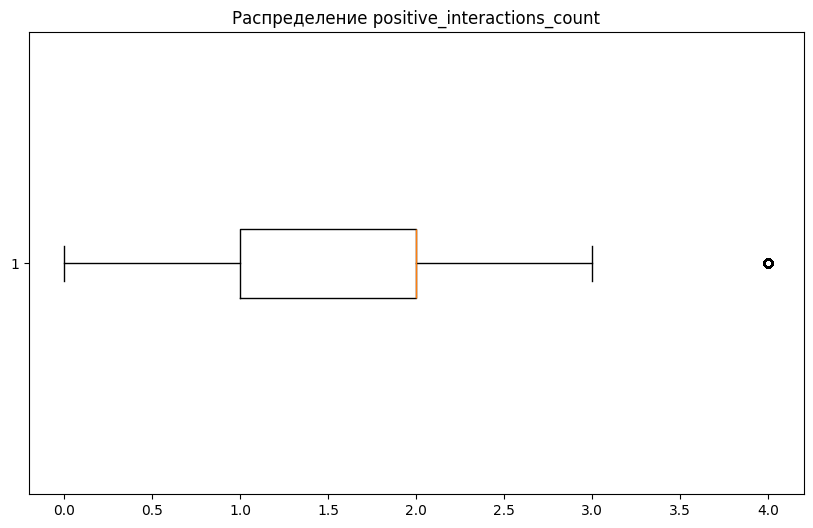

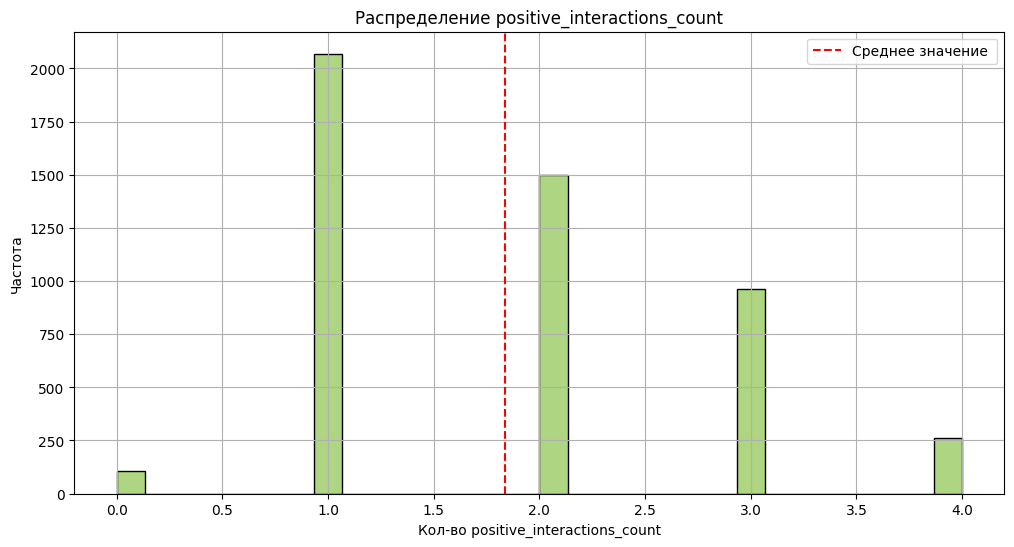

'99-й процентиль составил: 4.0, 95-й процентиль составил: 4.0'

In [21]:
diff (df['positive_interactions_count'])

Промежуточные итоги:
- Данные не имеют смещения. 
- Среднее значение составило 1.8, медиана - 2. Разницы практически нет.
- Минимальное значение составило 0, максимальное - 4. 
- Стандартное отклонение 0.945024.
- Выбросов в данных нет. 
- 99-й процентиль составил: 4.0, 95-й процентиль составил: 4.0.

Заметим, что присуствуют кол-во только 0, 1, 2, 3, 4. Больше всего поставиили кол-во 1. 

count    4901.000000
mean        0.863293
std         0.556301
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: negative_interactions_count, dtype: float64

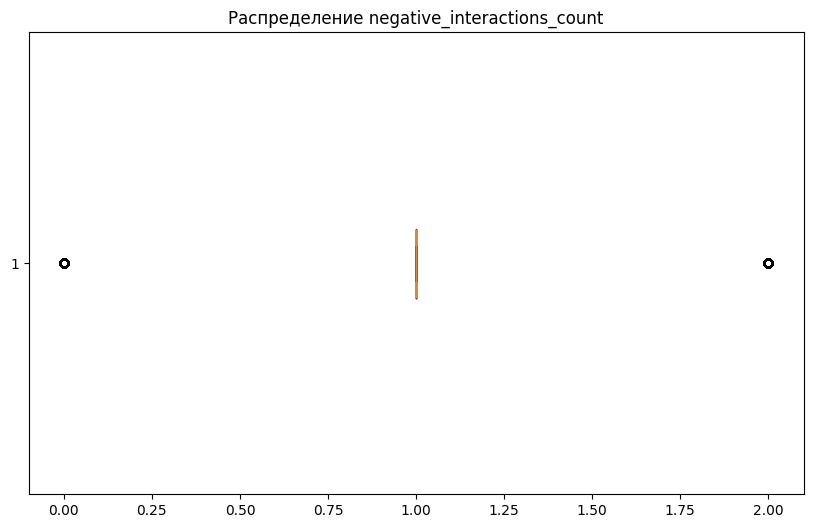

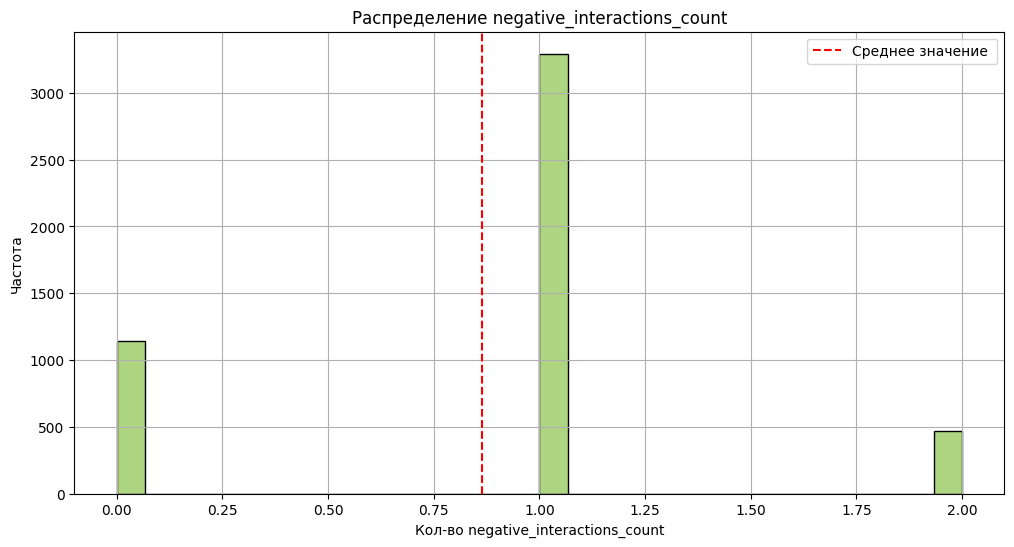

'99-й процентиль составил: 2.0, 95-й процентиль составил: 2.0'

In [22]:
diff (df['negative_interactions_count'])

Промежуточные итоги:
- Данные не имеют смещения. 
- Среднее значение составило 1.8, медиана - 2. Разницы практически нет.
- Минимальное значение составило 0, максимальное - 4. 
- Стандартное отклонение 0.945024.
- Выбросов в данных нет. 
- 99-й процентиль составил: 4.0, 95-й процентиль составил: 4.0.

Заметим, что присуствуют кол-во только 0, 1, 2. Больше всего поставиили кол-во 1.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4901 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   person_name                  4901 non-null   object        
 1   age                          4901 non-null   int8          
 2   date                         4901 non-null   datetime64[ns]
 3   gender                       4901 non-null   object        
 4   platform                     4901 non-null   object        
 5   daily_screen_time_min        4901 non-null   int16         
 6   social_media_time_min        4901 non-null   int16         
 7   negative_interactions_count  4901 non-null   int8          
 8   positive_interactions_count  4901 non-null   int8          
 9   sleep_hours                  4901 non-null   float32       
 10  physical_activity_min        4901 non-null   int8          
 11  anxiety_level                4901 non-null   int

Итоговые выводы по предобработке датасета:
- Датасет содержит 16 столбцов и 4901 строк. Пропусков нет.
- Столбцы `person_name`, `date`, `gender`, `platform`,  `mental_state` имеют тип данных `object`.     
- Столбцы `age`, `daily_screen_time_min`, `social_media_time_min`, `negative_interactions_count`, `positive_interactions_count`, `physical_activity_min`, `anxiety_level`, `stress_level`, `mood_level` имеют тип данных `int64`.
- Столбец `sleep_hours` имеет тип данных `float64`. 
- У столбцов с типами данных `int64` и `float64` была понижена размерность для оптимизации памяти. 
- У столбца `date` изменили тип данных с `object` на `datetime`, так как суть столбца - отражение даты события. 
- Неявных дубликатов не обнаружено, полных дубликатов по всем столбцам тоже. 
- Средний возраст - 29 лет, среднее ежедневное экранное время -  373 мин, среднее время в социальных сетях - 175 мин. 
- Добавили столбец `sleep_min`, который содержит время сна каждый день в минутах. Это необходимо для более удобного сравнения время сна с остальными временными показателями (`daily_screen_time_min`, `social_media_time_min`,`physical_activity_min`), выраженными в минутах. 
- Мы удалили из данных пользователей с `gender` `Other`.
- Последняя запись информации о пользователе: 2025-11-16 00:00:00, первая запись записи информации о пользователе: 2024-01-01 00:00:00'


## 2. Анализ пользователей в разрезе возраста, пола, платформы

Посмотрим, сколько пользователей в каждом возрастном сегменте, для этого поделим пользователей на детей и подросткой (1-17 лет), взрослых (30-59 лет), пожилых (60-70 лет). Далее посмотрим, сколько пользователей представлено в разрезе пола и платформы, которой они пользуются в Интернете. Данный пункт позволит сделать выводы о том, какие пользователи преобладают в нашем исследовании.

,age_segmentation,person_count,person_count_%
1,Молодежь,2348,47.91
2,Взрослые,1861,37.97
0,Дети и Подростки,487,9.94
3,Пожилые,205,4.18


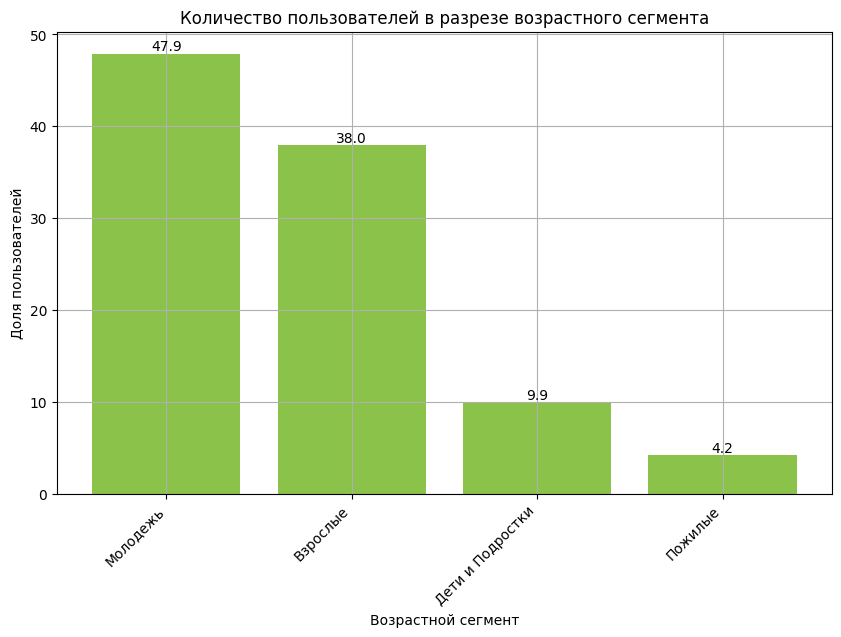

In [24]:
# Изучим пользователей в разрезе возраста
df['age_segmentation'] = pd.cut(df['age'], bins = [0, 17, 29, 59, 70], labels = ['Дети и Подростки', 'Молодежь', 'Взрослые', 'Пожилые'])

df_users_age_count = df.groupby('age_segmentation', observed=True)['person_name'].count().reset_index(name='person_count').sort_values(by = 'person_count', ascending = False)
person_total = df['person_name'].count()
df_users_age_count['person_count_%'] = round(df_users_age_count['person_count']/ person_total*100, 2)

display(df_users_age_count)

plt.figure(figsize=(10, 6))
bars = plt.bar(df_users_age_count['age_segmentation'], df_users_age_count['person_count_%'], color = '#8BC34A')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom',
             fontsize=10)
plt.title('Количество пользователей в разрезе возрастного сегмента')
plt.grid()
plt.xlabel('Возрастной сегмент')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Доля пользователей')
plt.show() 

Промежуточные итоги:
Мы поделили пользователей на группы по возрасту по следующему принципу (напомним, что минимальный возраст был 13 лет, а максимальный 69 лет):
- 1-17 - дети и  подростки
- 18 - 29 - молодежь
- 30-59 - взрослые
- 60-70 - пожилые 


Анализ в разрезе возраста показал, что:
- Больше всего пользователей в сегменте молодежь - 47.9% (2348 чел.). Почти половина от всех пользователей. 
- На втором месте взрослые - 38%, на третьем месте дети и подростки - 9.9%.
- Меньше всего пользователей в сегменте пожилые - 4.2% (205 чел.)

,gender,gender_count,gender_count_%
0,Female,2474,50.48
1,Male,2427,49.52


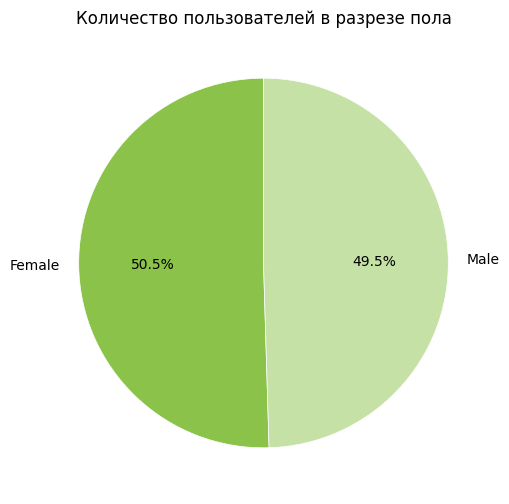

In [25]:
# Изучим пользователей в разрезе пола

df_users_gender_count = df.groupby('gender')['person_name'].count().reset_index(name = 'gender_count').sort_values(by = 'gender_count', ascending = False)
df_users_gender_count['gender_count_%'] = round(df_users_gender_count['gender_count']/ person_total*100, 2)

display(df_users_gender_count)

   
plt.figure(figsize = (12,6))
plt.pie(df_users_gender_count['gender_count'], labels = df_users_gender_count['gender'].unique(), autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 0.5}, colors = ['#8BC34A','#C5E1A5'])  # Границы секторов)
plt.title(f'Количество пользователей в разрезе пола')
plt.xticks(rotation = 45)
plt.show()

Промежуточные итоги:
- Мужичны (49.5%) и Женщины (50.5%) поделены между собой практически поровну. 

,platform,person_count,person_count_%
0,Facebook,725,14.79
3,TikTok,707,14.43
6,YouTube,705,14.38
5,WhatsApp,700,14.28
1,Instagram,692,14.12
2,Snapchat,687,14.02
4,Twitter,685,13.98


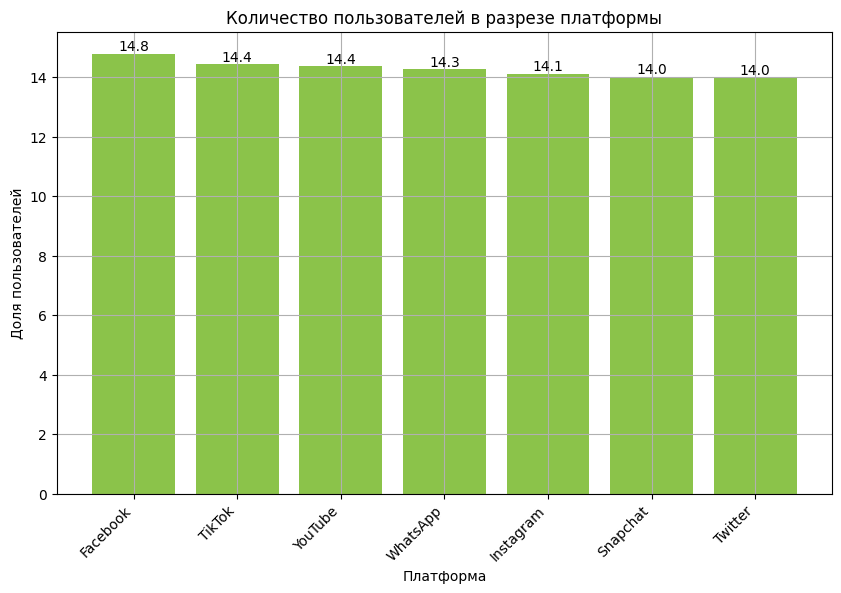

In [26]:
# Изучим пользователей в разрезе платформы

df_users_platform_count = df.groupby('platform')['person_name'].count().reset_index(name='person_count').sort_values(by = 'person_count', ascending = False)
person_total = df['person_name'].count()
df_users_platform_count['person_count_%'] = round(df_users_platform_count['person_count']/ person_total*100, 2)

display(df_users_platform_count)

plt.figure(figsize=(10, 6))
bars = plt.bar(df_users_platform_count['platform'], df_users_platform_count['person_count_%'], color = '#8BC34A')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom',
             fontsize=10)
plt.title('Количество пользователей в разрезе платформы')
plt.grid()
plt.xlabel('Платформа')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Доля пользователей')
plt.show() 

Промежуточные итоги:
- Можно заметить, что все платформы распределены между пользователями практически равномерно, разрыв между самой популярной платформой(Facebook - организация Meta запрещена на территории РФ) и самоей не популярной (Twitter (сейчас X) - запрещен на территории РФ) составил ~ 1%.

/var/folders/xl/_7t_lfxs2cn13d3n1jpw_wgm0000gn/T/ipykernel_9847/2424957567.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_gender_age.pivot_table(


gender,Female,Male
age_segmentation,,
Дети и Подростки,244.0,243.0
Молодежь,1201.0,1147.0
Взрослые,915.0,946.0
Пожилые,114.0,91.0


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

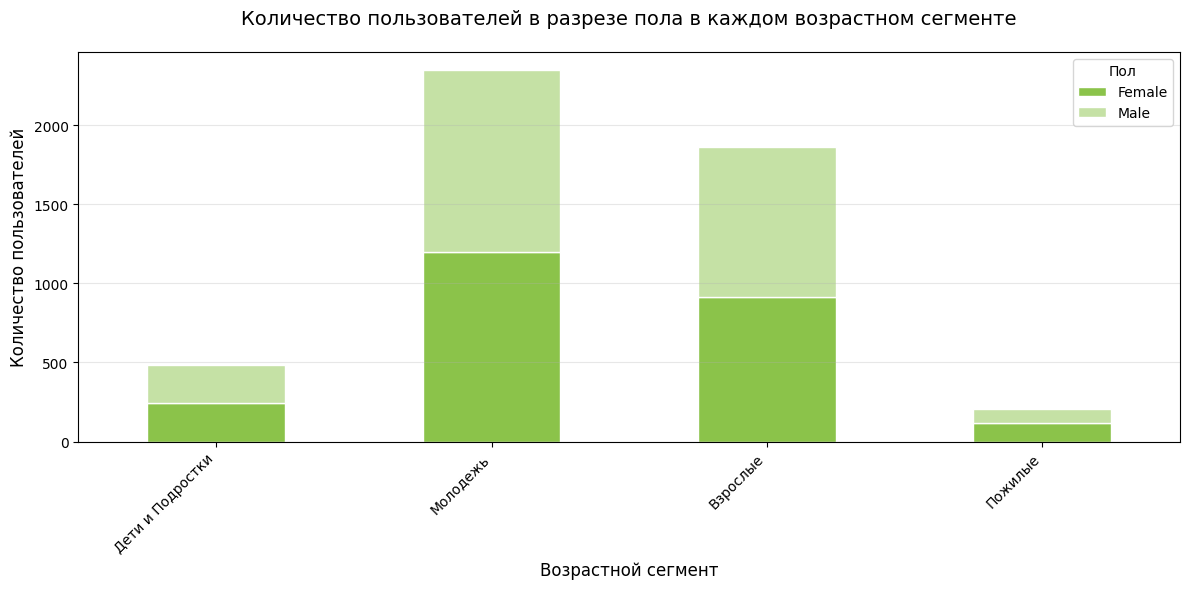

In [27]:
# Группируем и создаем сводную таблицу
df_gender_age = df.groupby(['age_segmentation', 'gender'], observed=True)['person_name'].count().reset_index()
pivot_table = df_gender_age.pivot_table(
    index='age_segmentation', 
    columns='gender', 
    values='person_name',
    fill_value=0
)

display(pivot_table)

# Создаем stacked bar chart
plt.figure(figsize=(12, 6))
colors = ['#8BC34A', '#C5E1A5']  # Зеленые цвета: насыщенный и пастельный

# Создаем stacked bar chart с зеленой палитрой
plt.figure(figsize=(12, 6))
pivot_table.plot.bar(stacked=True, figsize=(12, 6), color=colors, edgecolor='white', linewidth=1)

plt.title('Количество пользователей в разрезе пола в каждом возрастном сегменте', fontsize=14, pad=20)
plt.xlabel('Возрастной сегмент', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Пол')
plt.tight_layout()
plt.show()

Промежуточные итоги:
- В каждой возрастной группе пользователи по полу распределенеы практически попровну

Итоговые выводы по анализу пользователей в разрезе пола, возраста и платформы:

- Больше всего пользователей в сегменте молодежь - 47.9% (2348 чел.). Почти половина от всех пользователей. 
- На втором месте взрослые - 38%, на третьем месте дети и подростки - 9.9%.
- Меньше всего пользователей в сегменте пожилые - 4.2% (205 чел.)
- Диспропорция в количестве пользователей в разрезе пола и платформы практически отсуствует. В каждой возрастной группе присуствует практически одинаковое количество мужчин и женщин. 

## 3. Анализ цифровых привычек и ментального здоровья

В данном пункте мы изучим:
1. В разрезе возрастных сементов и пола показатели среднего экранного времени, вреднего времени в социальных сетях, средней физической активности, среднего времени сна. 

2. В общем и в разрезе пола и возраста распределение пользователей по уровню стрессса, тревожности, настроения, ментальному состоянию, позитивный и негативный опыт онлайн. 

3. Изучим в разрезе пола и возраста самые популчрные платформы.

In [28]:
# Напишем функцию для изучения средних значений столбцов в разрезе возрастного сегмента
def segment(point):
    segmentation = df.groupby('age_segmentation', observed=True)[point].mean().reset_index().sort_values(by = point, ascending = False)
    segmentation[point] = segmentation[point].round(2)
    display(segmentation)
    plt.figure(figsize=(12,6))
    bars = plt.bar(segmentation['age_segmentation'], segmentation[point], color = '#8BC34A')
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom',
             fontsize=10)
    plt.title(f'Среднее значение {point} в разрезе возрастных групп')
    plt.xlabel(f'Среднее значение {point}')
    plt.ylabel('Возрастная группа')
    plt.grid()
    plt.show()

,age_segmentation,daily_screen_time_min
1,Молодежь,450.37
0,Дети и Подростки,420.02
2,Взрослые,284.72
3,Пожилые,179.89


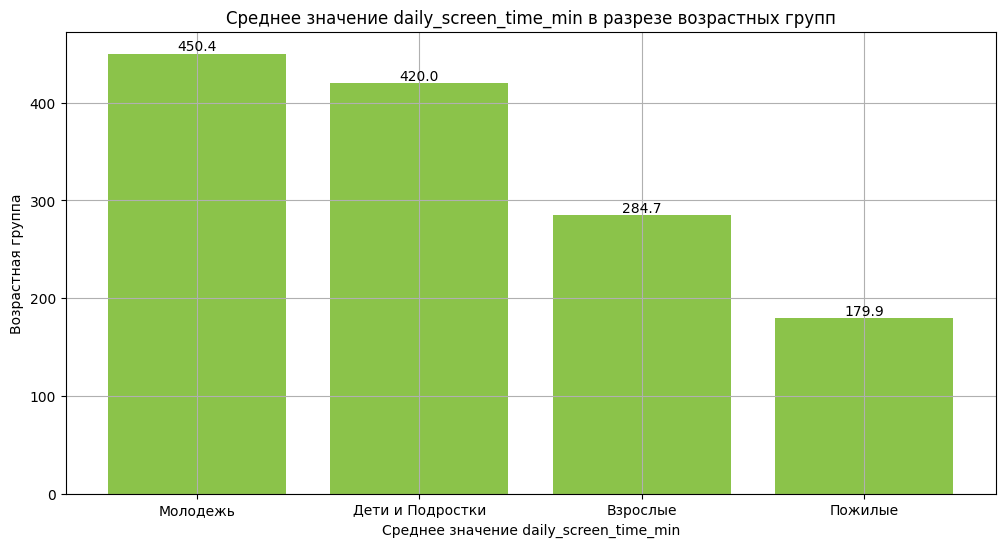

In [29]:
segment ('daily_screen_time_min')

Промежуточные итоги:
- Больше всего в среднем экранного времени у молодежи - 450.4 мин.
- На втором месте дети и подростки - 420.2 мин, на третьем взрослые 284.7 мин.
- Меньше всего времени экранного времени у пожилых - 179.9 мин. 

Вполне логичное распределение, молодежь и работает, и учится, и отдыхает онлайн, поэтому такое высокое значение среднего экранного времени. Дети и подростки делают все то же самое в гаджетах, кроме работы. Взрослые используют Интернет больше для работы, меньше для отдыха и учебы, Пожилые используют Интернет меньше всего для общения с близкими и отдыха. 

,age_segmentation,social_media_time_min
1,Молодежь,210.30
0,Дети и Подростки,197.31
2,Взрослые,135.30
3,Пожилые,86.59


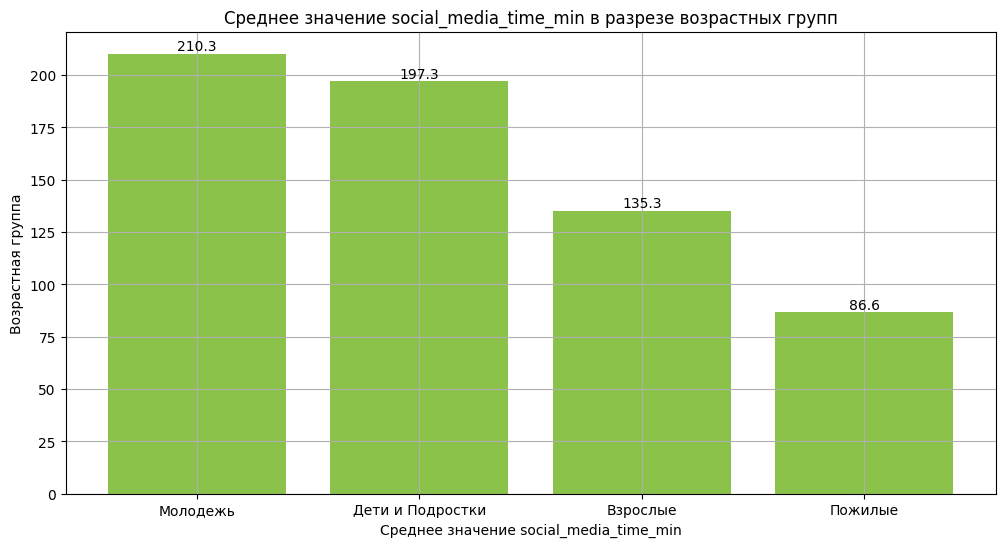

In [30]:
segment ('social_media_time_min')

Промежуточные итоги:
- Больше всего в среднем времени в социальных сетях у молодежи - 210.3 мин.
- На втором месте дети и подростки - 197.3 мин, на третьем взрослые 135.3 мин.
- Меньше всего времени в социальных сетях у пожилых - 86.6 мин. 

Вполне логичное распределение, аналогично распредленижю среднему экранному времени.

,age_segmentation,physical_activity_min
3,Пожилые,42.00
2,Взрослые,31.52
0,Дети и Подростки,18.00
1,Молодежь,14.97


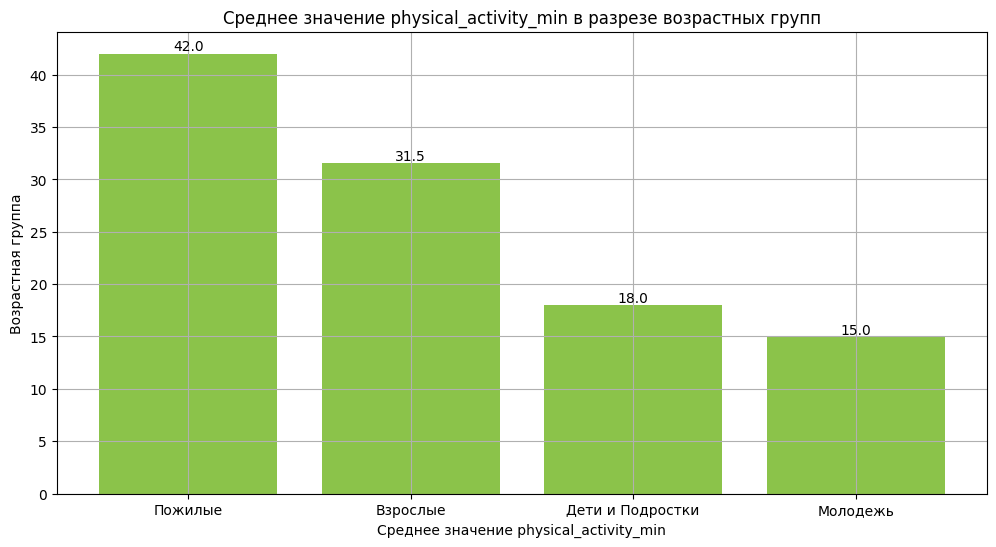

In [31]:
segment ('physical_activity_min')

Промежуточные итоги:
- Больше всего в среднем времени физической активности у пожилых - 42.0 мин.
- На втором месте взрослые - 31.5 мин, на третьем дети и подростки 18.0 мин.
- Меньше всего времени физической активности в среднем у молодежи - 15.0 мин. 

Немного удивительно, что больше всего физической активности у пожилых, возможно это связано с тем, что у пожилых больше свободного времени, чем у остальных возрастных групп. Возможно данная группа имеет большую потребность в физической активности, так как чувствует боли в теле при ее отсутсвии. Взрослые как правило работают и уделяют много времени семье и детям, но смотрят в будущее и видят необходимость в физических нагрузках для поддержания формы и здоровья. Дети и подростки как правило много гуляют и имеют занятия физкультурой в школе, у молодежи в целом мало свободного времени, они совмещают учебу, работу и личную жизнь, на спорт времени не остается.

Опять же важно, что подразумевается под физической активностью - целенаправенные занятия в спортивном зале или другим видом спорта в специально отведенное время, в специальном помещении и с тренером, а все остальное не в счет или же мы считаем за физическую активность прогулку до магазина, быструю утреннюю разминку. Также важно понимать, что именно каждая из групп подразумевается под физической активностью. Для молодежи быть целый день на ногах и в дороге - норма и они не считают это особой физической активностью, но для пожилого человека это большая нагрузка, после которой он чувствует большую усталость и поэтому относит поездки по городу к физической активности. Еще важный пункт, что в среднем больше 1 часа ни одна группа не занимается физической активностью, что скорее всего свидетельствует о том, что под физической активностью имеются в виду не продолжительные регулярные занятия спортом, а прогулки, зарядки и тд. Эту неопределенность в данном случае не решить, так как мы работает с уже существующим набором данных и дополнительной информации не имеем. 

Рекомендация: при последующем сборе данных конкретизируйте, что имеется в виду под физической активностью и при опросе респондентам следует задавать конкретные вопросы об их базовой физической активности, о занятиях спортом и т.д.

,age_segmentation,sleep_min
3,Пожилые,486.059998
2,Взрослые,454.690002
0,Дети и Подростки,413.940002
1,Молодежь,404.820007


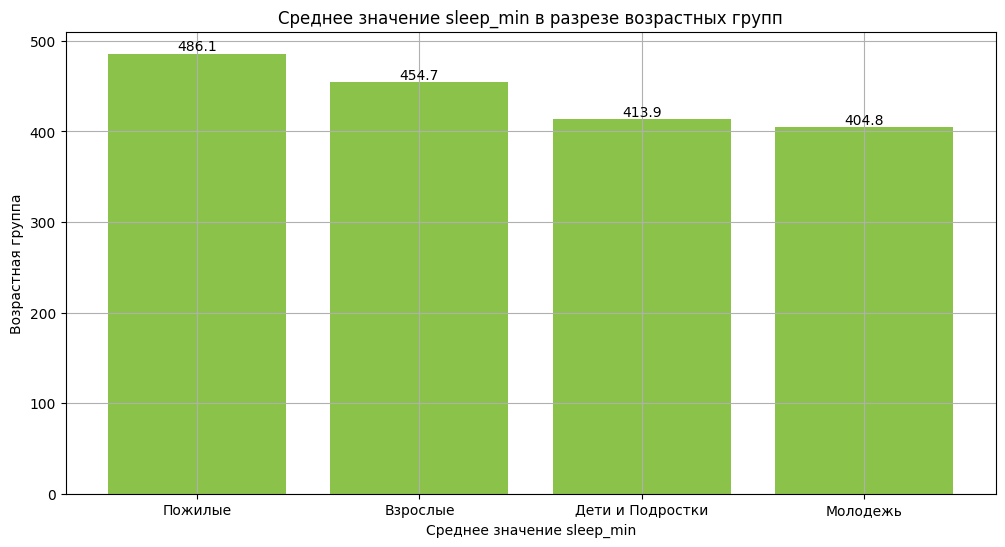

In [32]:
segment ('sleep_min')

Промежуточные итоги:
- Больше всего в среднем времени сна у пожилых - 486.1 мин.
- На втором месте взрослые - 454.7 мин, на третьем дети и подростки 413.9 мин.
- Меньше всего времени физической активности в среднем у молодежи - 404.8 мин. 

В целом тоже логичное распределение, которое связано с занятостью и состоянием здоровья каждой группы, чем больше занятость и лучше здоровье, тем меньше сна у возрастного сегмента пользователей. 

Ниже дадим для наглядности точно такое же распределение в часах. 

,age_segmentation,sleep_hours
3,Пожилые,8.10
2,Взрослые,7.58
0,Дети и Подростки,6.90
1,Молодежь,6.75


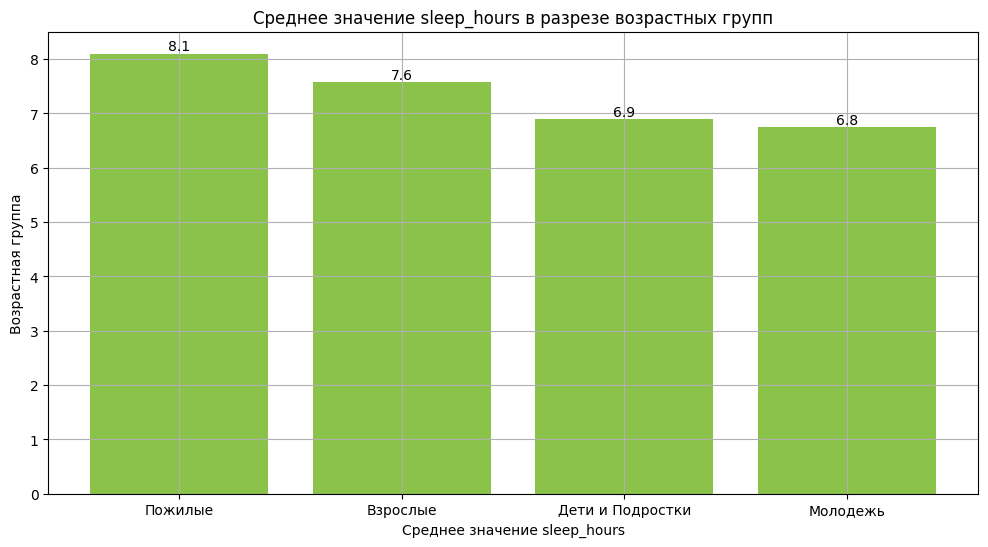

In [33]:
segment ('sleep_hours')

Далее проанализируем те же показатели в разрезе пола. 

In [34]:
# Напишем функцию для изучения средних значений столбцов в разрезе пола
def segment_gender(point):
    segmentation = df.groupby('gender')[point].mean().reset_index().sort_values(by = point, ascending = False)
    segmentation[point] = segmentation[point].round(2)
    display(segmentation)

    plt.figure(figsize = (12,6))
    plt.pie(segmentation[point], labels = segmentation['gender'].unique(), autopct='%1.1f%%', startangle=90,wedgeprops={'edgecolor': 'white', 'linewidth': 0.5}, colors = ['#8BC34A','#C5E1A5'])  # Границы секторов)
    plt.title(f'Среднее значение {point} в разрезе пола')
    plt.xticks(rotation = 45)
    plt.show()

,gender,daily_screen_time_min
0,Female,373.63
1,Male,372.64


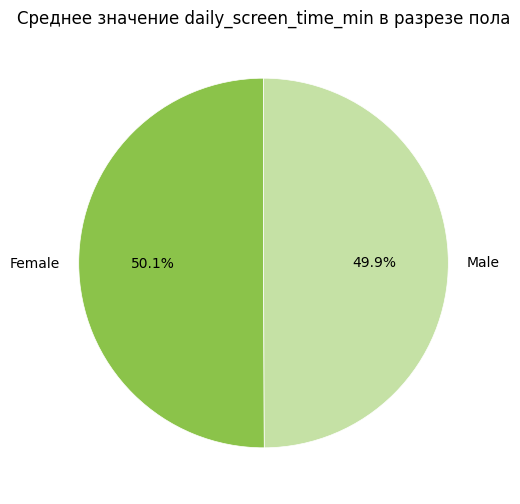

In [35]:
segment_gender ('daily_screen_time_min')

,gender,social_media_time_min
1,Male,175.48
0,Female,175.23


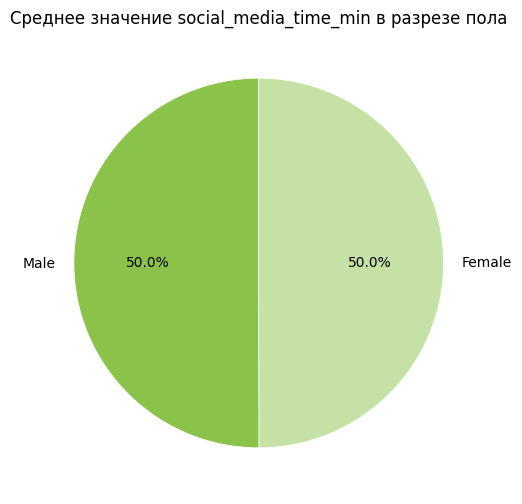

In [36]:
segment_gender ('social_media_time_min')

,gender,physical_activity_min
1,Male,22.73
0,Female,22.64


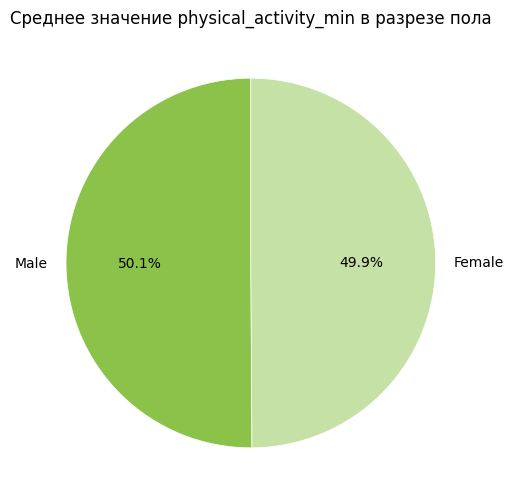

In [37]:
segment_gender ('physical_activity_min')

,gender,sleep_min
1,Male,428.209991
0,Female,427.910004


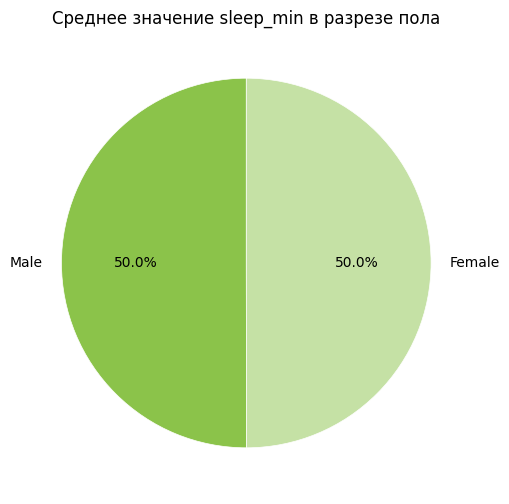

In [38]:
segment_gender ('sleep_min')

,gender,sleep_hours
1,Male,7.14
0,Female,7.13


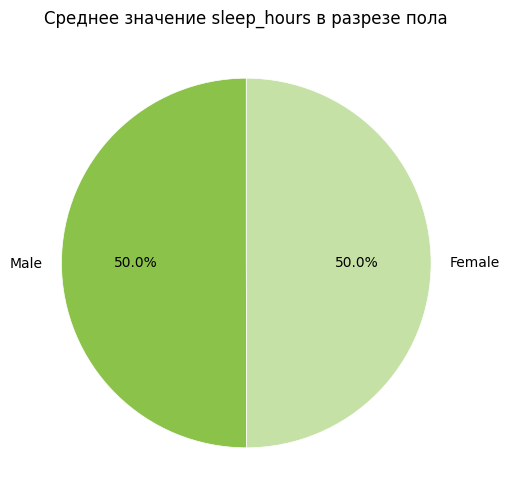

In [39]:
segment_gender ('sleep_hours')

По полу нет сильной диспропорции ни по одному признаку, у женщин и мужчин практически одинаковы показатели среднего экранного времени, вреднего времени в социальных сетях, средней физической активности, среднего времени сна. 

Далее посмотрим в общем и в разрезе пола и возраста распределение пользователей по уровню стрессса, тревожности, настроения, ментальному состоянию, позитивный и негативный опыт онлайн. 

,age_segmentation,stress_level
1,Молодежь,7.73
0,Дети и Подростки,7.71
2,Взрослые,6.35
3,Пожилые,5.49


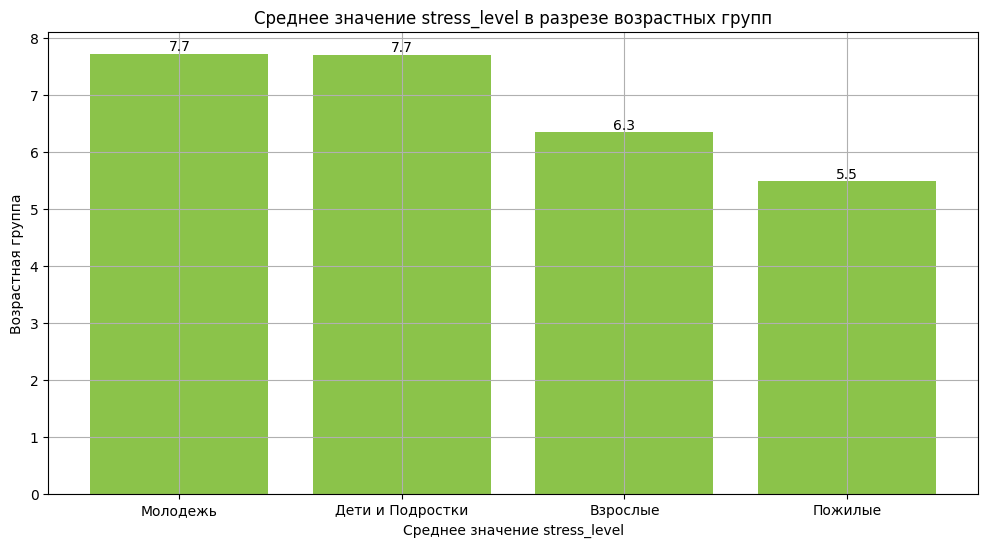

In [40]:
segment('stress_level')

Промежуточные итоги:
- Наибольший средний уровень стресса у молодежи и у детей и подростков - 7.7.
- У взрослых уровень стресса составил 6.3.
- У пожилых уровень стресса составил 5.5. 
- Заметим, что при анализе выбросов было выявлено, что присуствуют оценки только 5, 6, 7, 8, 9, Больше всего поставиили оценку 8. 

Вызван ли уровень стресса соцсетями, насколько сильная корреляция с экранным временем и временем в социальных сетях мы проверим в следующем пункте. 

,age_segmentation,anxiety_level
1,Молодежь,2.85
0,Дети и Подростки,2.79
2,Взрослые,2.12
3,Пожилые,1.49


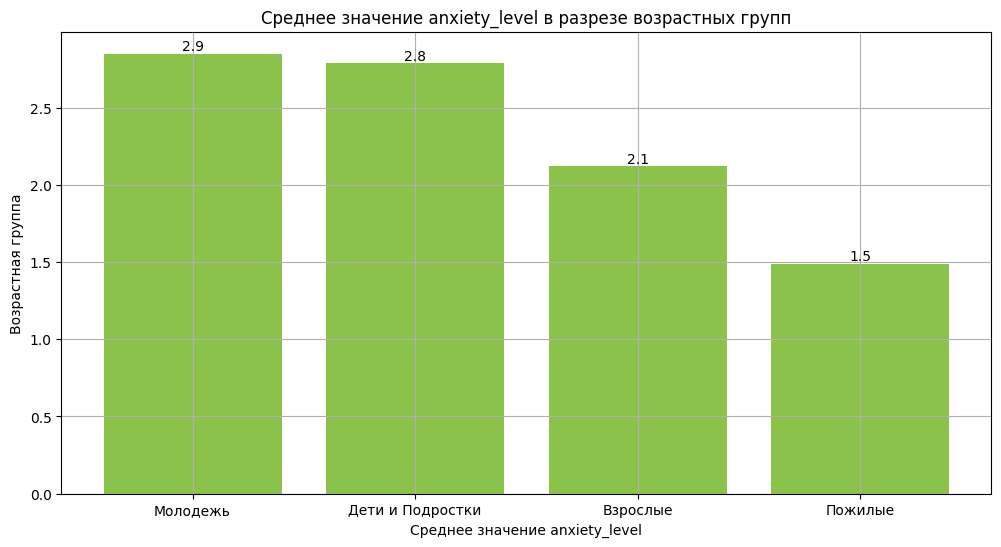

In [41]:
segment('anxiety_level')

Промежуточные итоги:
- Наибольший средний уровень тревоги у молодежи - 2.9.
- На втором месте по уровню тревоги дети и подростки - 2.8
- У взрослых тревоги составил 2.1
- У пожилых уровень тревоги составил 1.5. 
- Заметим, что при анализе выбросов было выявлено, что присуствуют оценки только 1, 2, 3, 4. Больше всего поставиили оценку 3. 

Вызван ли уровень тревоги соцсетями, насколько сильная корреляция с экранным временем и временем в социальных сетях мы проверим в следующем пункте. 

,age_segmentation,mood_level
3,Пожилые,6.51
2,Взрослые,6.10
0,Дети и Подростки,5.26
1,Молодежь,5.25


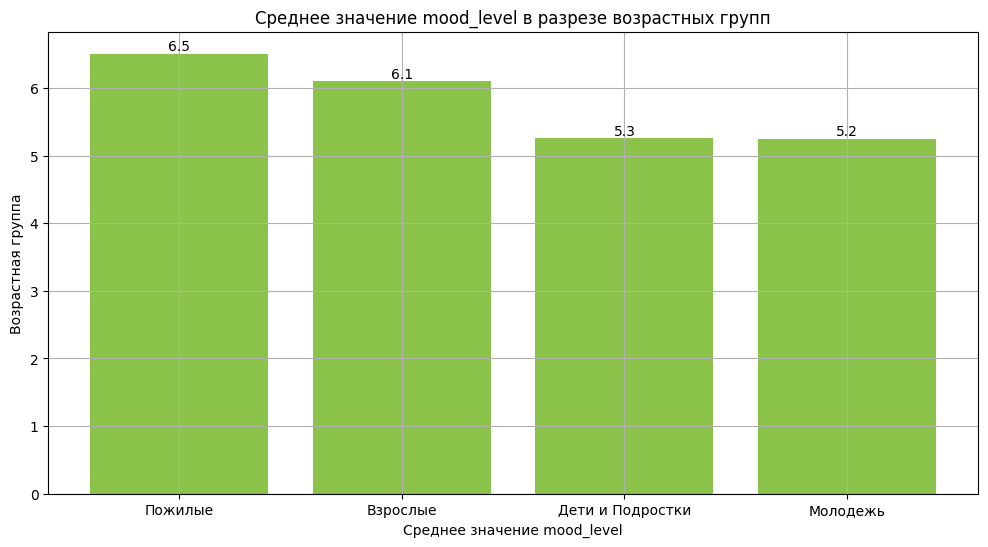

In [42]:
segment('mood_level')

Промежуточные итоги:
- Наибольший средний уровень настроения у пожилых - 6.5
- На втором месте по уровню настроения взрослые - 6.1
- У детей и подросткой настроения составил 5.3
- У молодежи уровень настроения составил 5.2 
- Заметим, что при анализе выбросов было выявлено, что присуствуют оценки только 4, 5, 6, 7. Больше всего поставиили оценку 6. 

Вызван ли уровень настроения соцсетями, насколько сильная корреляция с экранным временем и временем в социальных сетях мы проверим в следующем пункте. 

,age_segmentation,positive_interactions_count
1,Молодежь,2.21
0,Дети и Подростки,1.99
2,Взрослые,1.43
3,Пожилые,0.92


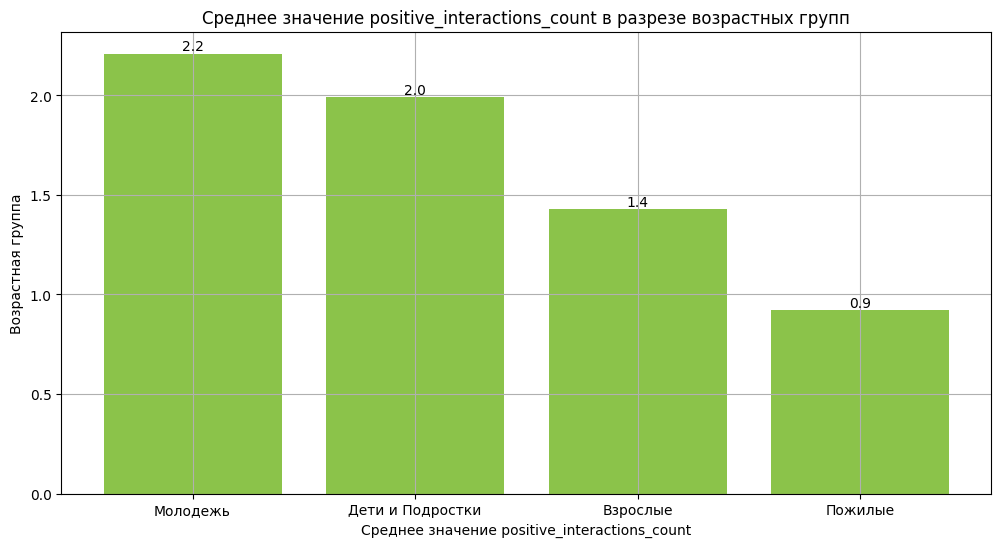

In [43]:
segment('positive_interactions_count')

Промежуточные итоги:
- Наибольшее среднее кол-во позитивного опыта онлайн у молодежи - 2.2
- На втором месте по кол-ву позитивного опыта онлайн дети и подростки - 2.0
- У взрослых кол-во позитивного опыта онлайн составило 1.4
- У пожилых кол-во позитивного опыта онлайн составило 0.9 
- Заметим, что при анализе выбросов было выявлено, что присуствуют кол-во только 0, 1, 2, 3, 4. Больше всего поставиили кол-во 1. 

,age_segmentation,negative_interactions_count
1,Молодежь,1.02
0,Дети и Подростки,0.99
2,Взрослые,0.69
3,Пожилые,0.25


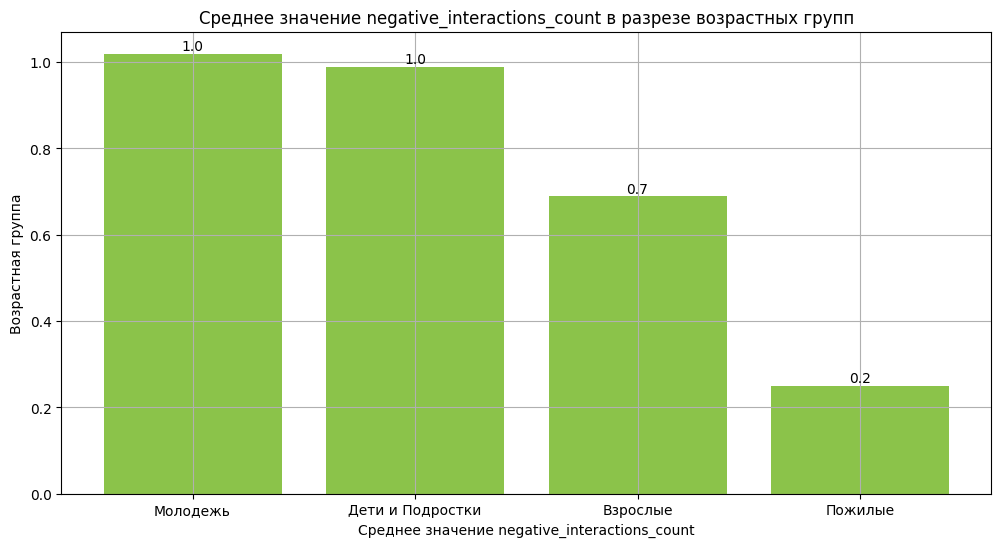

In [44]:
segment('negative_interactions_count')

Промежуточные итоги:
- Наибольшее среднее кол-во позитивного опыта онлайн у молодежи - 2.2
- На втором месте по кол-ву позитивного опыта онлайн дети и подростки - 2.0
- У взрослых кол-во позитивного опыта онлайн составило 1.4
- У пожилых кол-во позитивного опыта онлайн составило 0.9 
- Заметим, что при анализе выбросов было выявлено, что присуствуют кол-во только 0, 1, 2. Больше всего поставиили кол-во 1.

,gender,stress_level
1,Male,7.12
0,Female,7.10


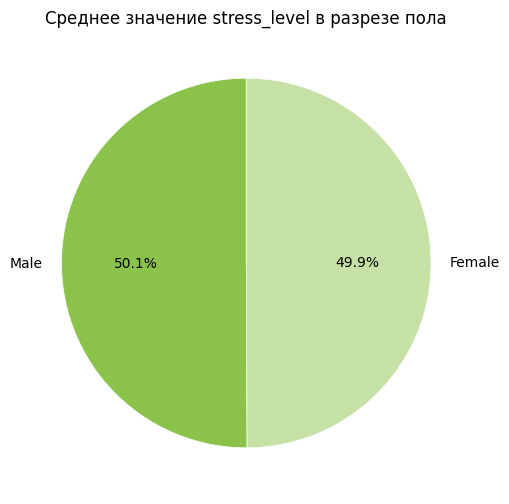

In [45]:
segment_gender ('stress_level')


,gender,anxiety_level
1,Male,2.51
0,Female,2.51


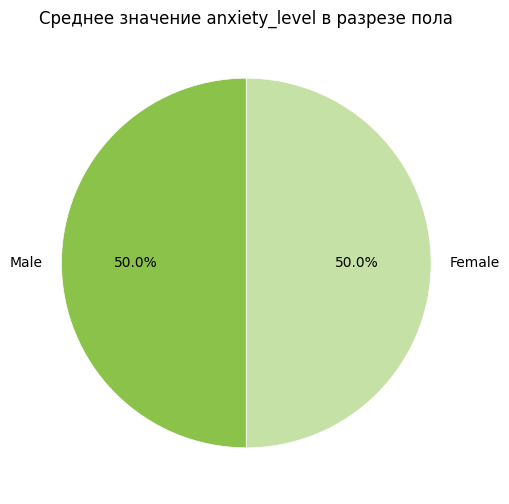

In [46]:
segment_gender ('anxiety_level')

,gender,mood_level
0,Female,5.63
1,Male,5.62


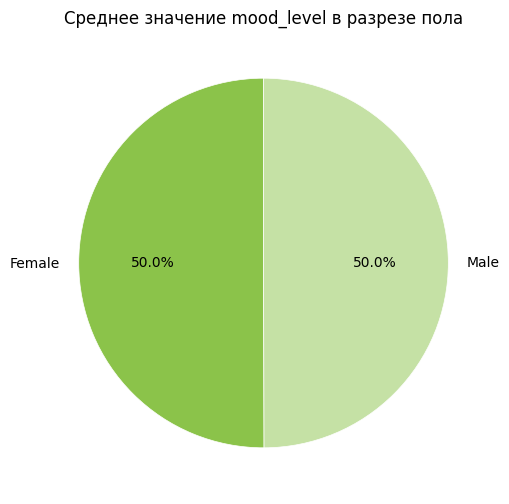

In [47]:
segment_gender ('mood_level')

,gender,positive_interactions_count
1,Male,1.85
0,Female,1.83


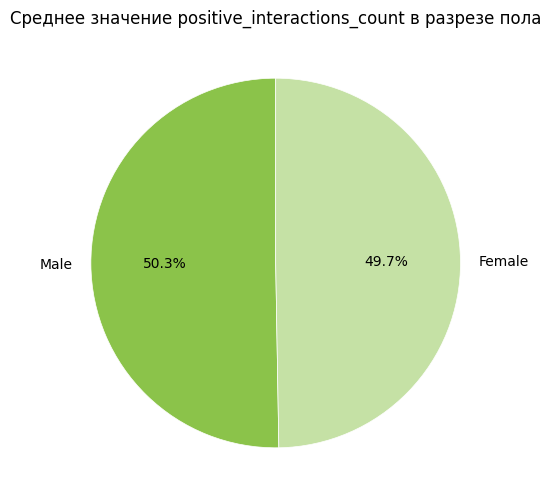

In [48]:
segment_gender ('positive_interactions_count')

,gender,negative_interactions_count
1,Male,0.87
0,Female,0.86


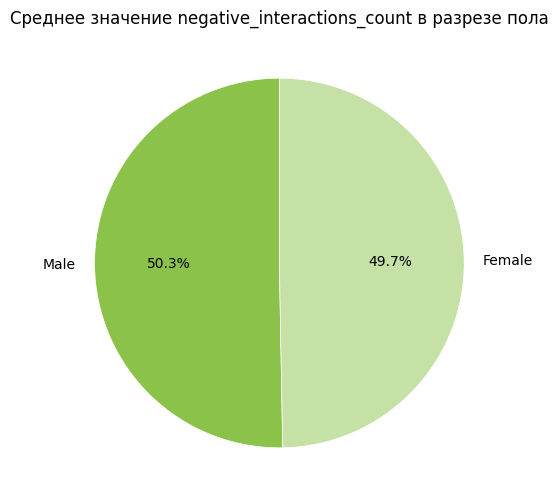

In [49]:
segment_gender ('negative_interactions_count')

По полу нет сильной диспропорции ни по одному признаку, у женщин и мужчин практически одинаковы показатели уровня стресса, уровня тревоги, уровня настроения, количеству позитивного и негативного опыта онлайн. 

Далее посмторим на то, как чаще всего характеризуют свое ментальное состояние пользователи в общем, в разрезе возрастной группы и пола. 

,mental_state,person_count,percentage
2,Stressed,4510,92.02
1,Healthy,334,6.81
0,At_Risk,57,1.16


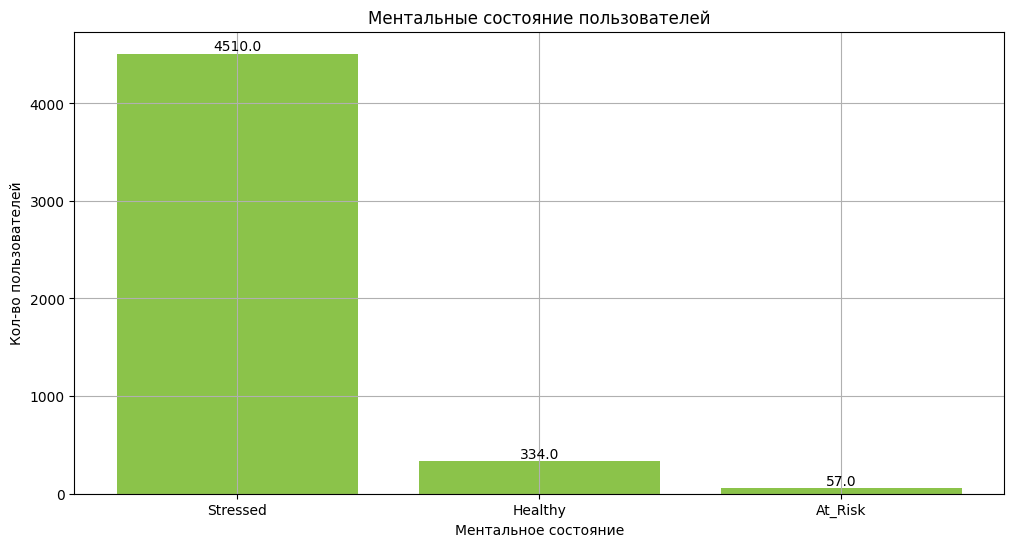

In [50]:
# Проанализируем пользователей в общем
mental_stt_total = df.groupby('mental_state')['person_name'].count().reset_index(name = 'person_count').sort_values(by = 'person_count', ascending = False)
total = df['person_name'].count()
mental_stt_total['percentage'] = round(mental_stt_total['person_count']/total*100, 2)
display(mental_stt_total)
plt.figure(figsize=(12,6))
bars = plt.bar(mental_stt_total['mental_state'], mental_stt_total['person_count'], color = '#8BC34A')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom',
             fontsize=10)
plt.title(f'Ментальные состояние пользователей')
plt.xlabel(f'Ментальное состояние')
plt.ylabel('Кол-во пользователей')
plt.grid()
plt.show()

Среди всех  пользователей наиболее популярное ментальное состояние - `Stressed` (у 4510 пользователя - 92.02% от общего количества пользователей), на втором месте `Healthy` (334 пользователя - 6.81%), на третьем месте ментальное состояние `At_Risk` (57 пользователей - 1.16%)

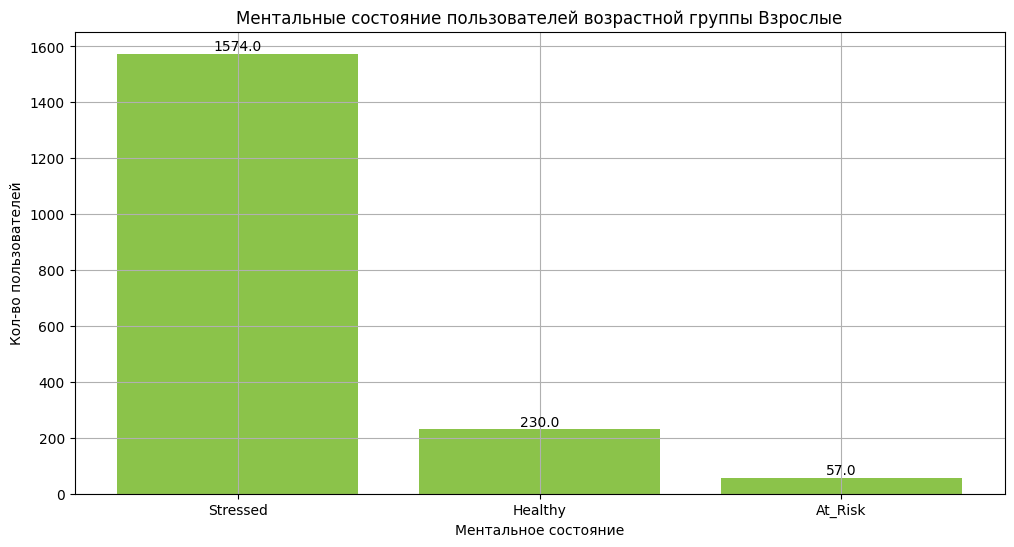

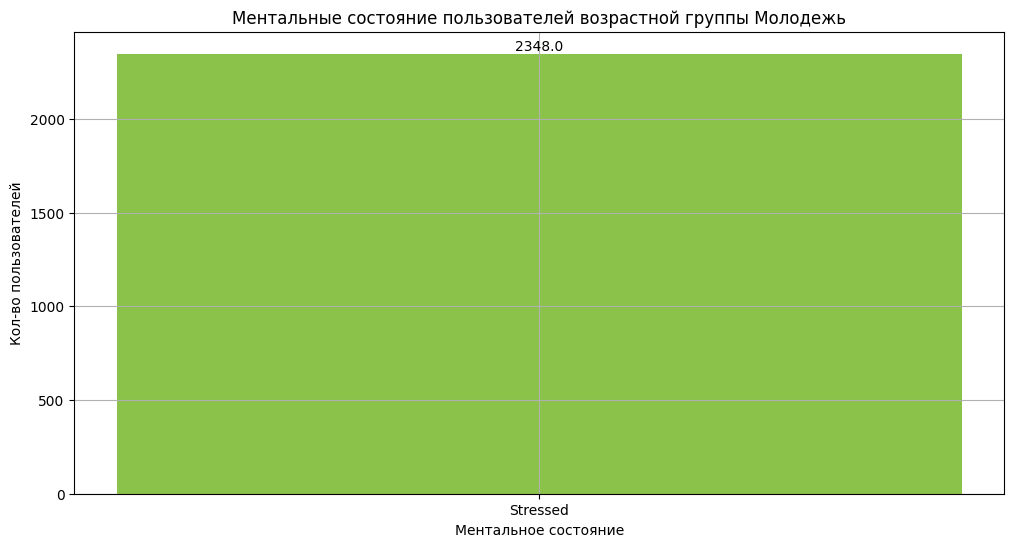

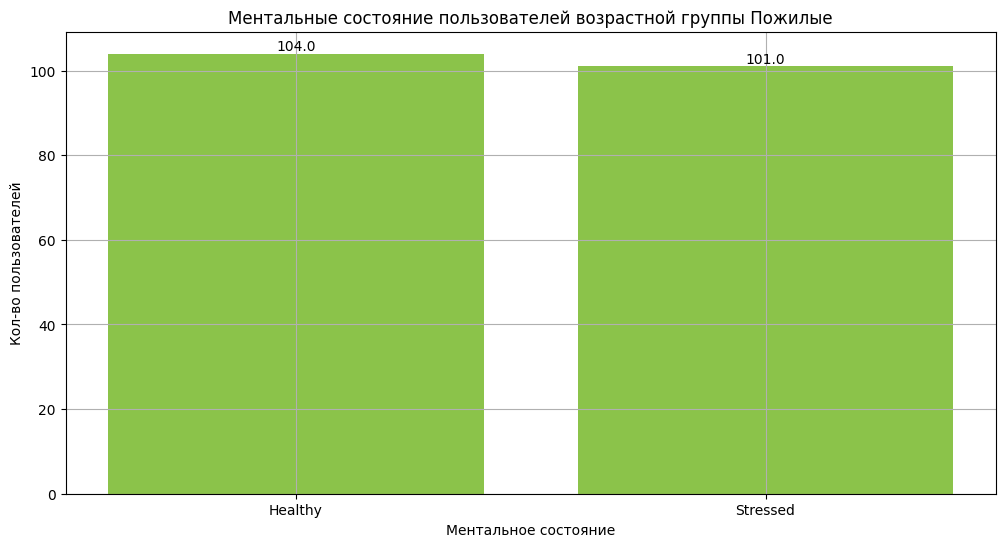

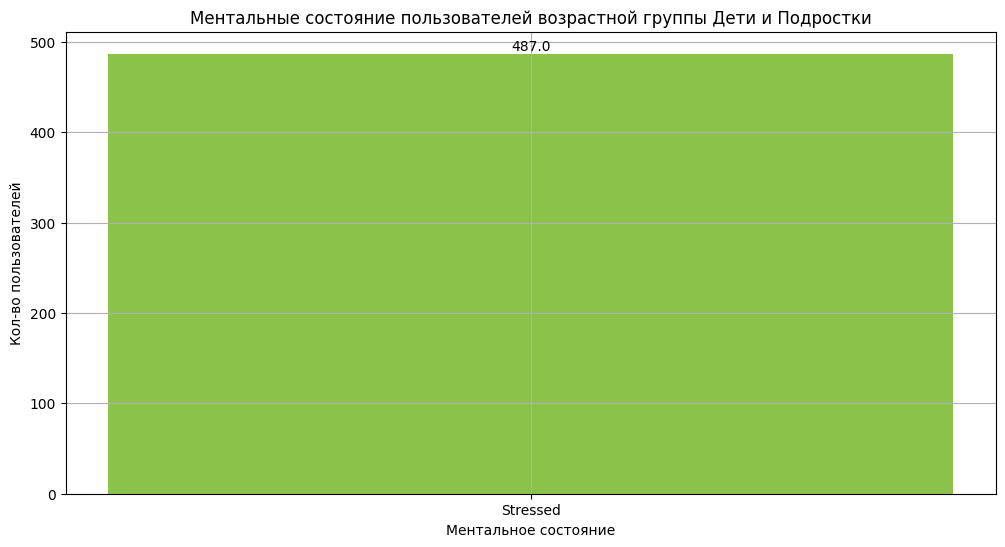

In [51]:
for age in df['age_segmentation'].unique():
    df_plot = df[df['age_segmentation'] == age].groupby('mental_state')['person_name'].count().reset_index().sort_values(by = 'person_name', ascending = False)

    plt.figure(figsize=(12,6))
    bars = plt.bar(df_plot['mental_state'], df_plot['person_name'], color = '#8BC34A')
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom',
             fontsize=10)
    plt.title(f'Ментальные состояние пользователей возрастной группы {age}')
    plt.xlabel(f'Ментальное состояние')
    plt.ylabel('Кол-во пользователей')
    plt.grid()
    plt.show()

Промежуточные итоги:
- У группы 'Взрослые' представлены все три характеристики ментального состояние: `Stressed` у 1574 пользователей, `Healthy` у 230 пользователей, ментальное состояние `At_Risk` у 57 пользователей. 
- У 'Молодежи' представлено только состояние `Stressed` у 2348 пользователей.
- У 'Пожилых' представлено две характеристики ментального состояния: `Stressed` у 104 пользователей, `Healthy` у 101 пользователя. Практически ровно пополам. 
- У 'Детей и Подростков' представлено только состояние `Stressed` у 487 пользователей.

Несмотря на то, что время проведенное в гаджете и социальных сетях больше у молодежи и детей и подростков, ментальное состояние `At_Risk` представлено только у взрослых. Важный момент, что люди могут по-разному характеризовать одни и те же состояния, кто-то испытывает стресс, кто-то считает, что он в критическом состоянии, хотя ситуации одинаковые. Для этого при проведении опроса должны были быть выработаны четкие критерии, которые отличают ментальные состояния между собой, тчобы люди наиболее точно характеризовали свое состояние. Также, важно понимать, что не только гаджеты, социальные сети и интернет формируют ментальное состояние, все зависит от образа жизни каждой возрастной группы и каждого отдельного человека. Тем более люди могут испытывать стресс, например, от проблем в семье или на работе, но не замечают этого и списывают причину своего ментального состояния на интернет. Все эти неточности решаются на этапе проведения опроса, формирования критериев и т.д. В следующем пункте мы посмотрим корреляцию ментального состояния с показателями, которые характеризуют проведенное в гаджетах время. 

Сейчас можно предположить, что у детям в целом сложно разграничивать свои эмоции, они также редко находятся на грани. Возможно некоторе подростки испытывают стресс из-за буллинга в социальных сетях по поводу внешности и других качеств, но их стресс также может быть связан с их образом жизни, недостатком сна или недостаточной физ.активностью, предстоящими экзаменами или непониманием и ссорами с родителями. Как уже было сказано ранее, нужно более четко проводить опрос и понимать, точно ли респонденты отвечают на вопрос о стрессе, полученном онлайн, а не вообще. У молодежи стресс может быть связан с перегрузом от нахождения в гаджетах, у этой группы самые высокие средние показатели экранного времени и времени в социальных сетях. У взрослых стресс может быть связан и от определенного перегруза социальными сетями, так как они еще и поколение, которые родилось без такой сильной цифровизации, в отличе от молодежи и детей и подростков, и для них тяжелее адаптироваться в интернете, гаджетах, социальныъ сетях. У пожилых стресс может быть связан с непониманием и нежелением цифровизироваться. 

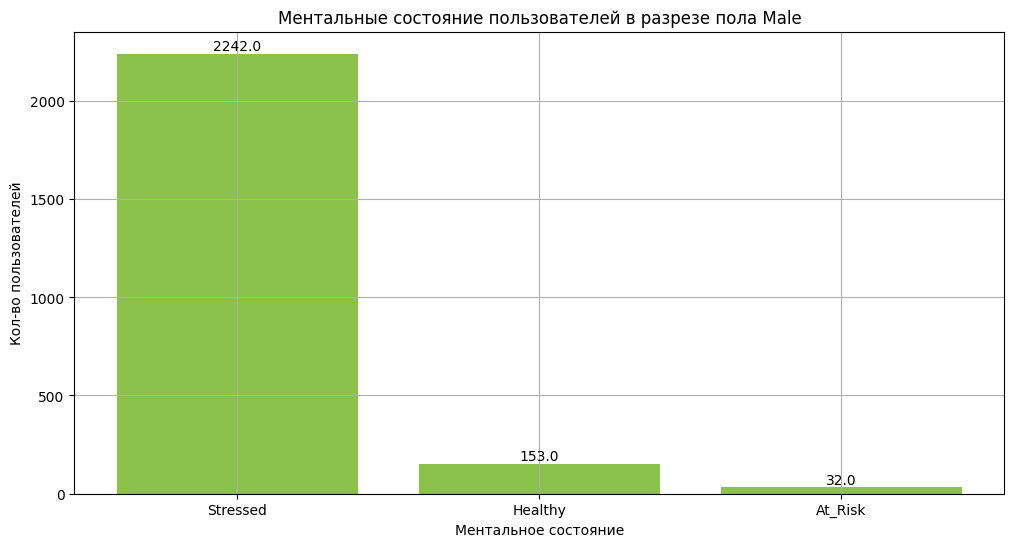

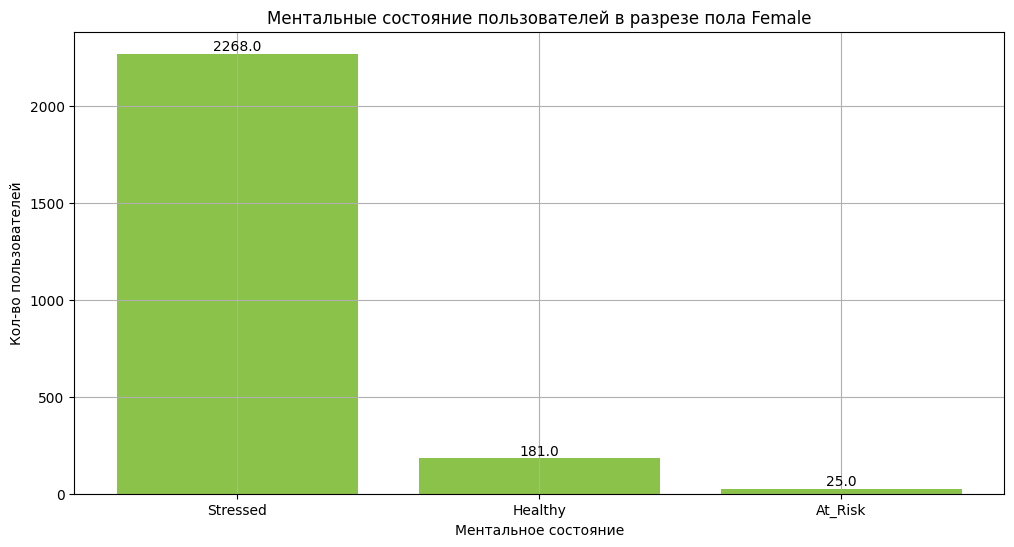

In [52]:
for gender in df['gender'].unique():
    df_plot = df[df['gender'] == gender].groupby('mental_state')['person_name'].count().reset_index().sort_values(by = 'person_name', ascending = False)

    plt.figure(figsize=(12,6))
    bars = plt.bar(df_plot['mental_state'], df_plot['person_name'], color = '#8BC34A')
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom',
             fontsize=10)
    plt.title(f'Ментальные состояние пользователей в разрезе пола {gender}')
    plt.xlabel(f'Ментальное состояние')
    plt.ylabel('Кол-во пользователей')
    plt.grid()
    plt.show()

В разрезе пола распределение характеристик ментального здоровья соответсвует по сути распределению по пользователям в целом, самое распространенное и нераспространенное ментальное состояние совпадают. 


Далее посмотрим, какими платформами больше пользуются в разрезе каждого возрастного сегмента и пола

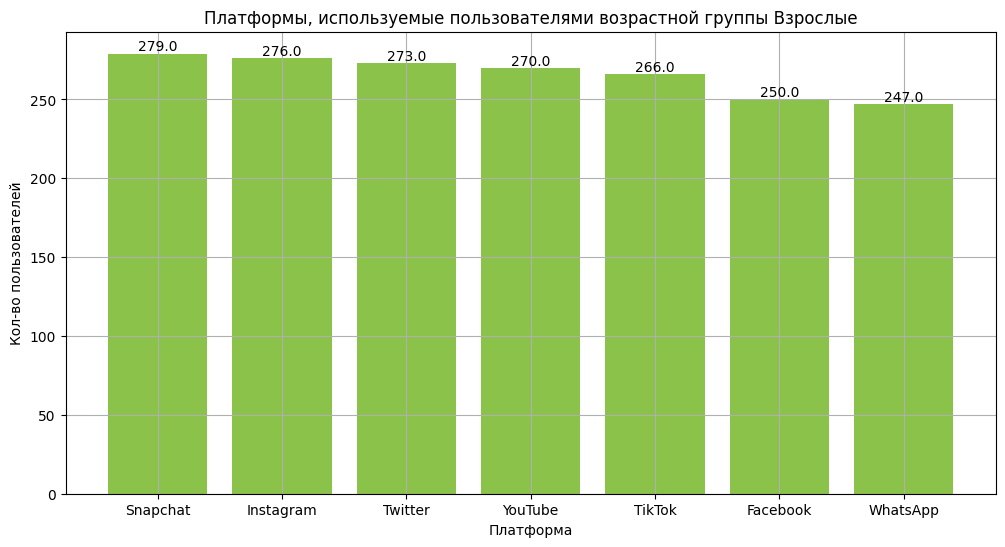

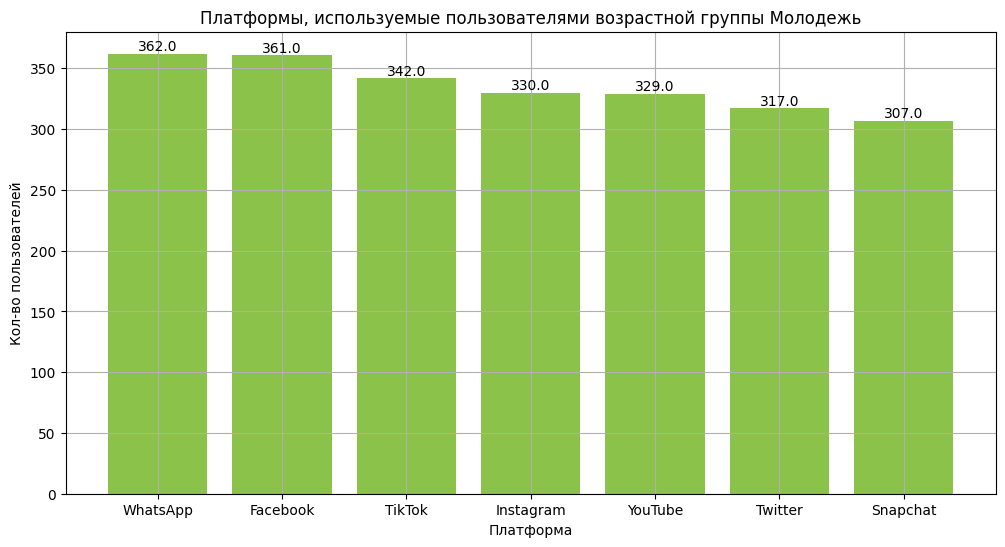

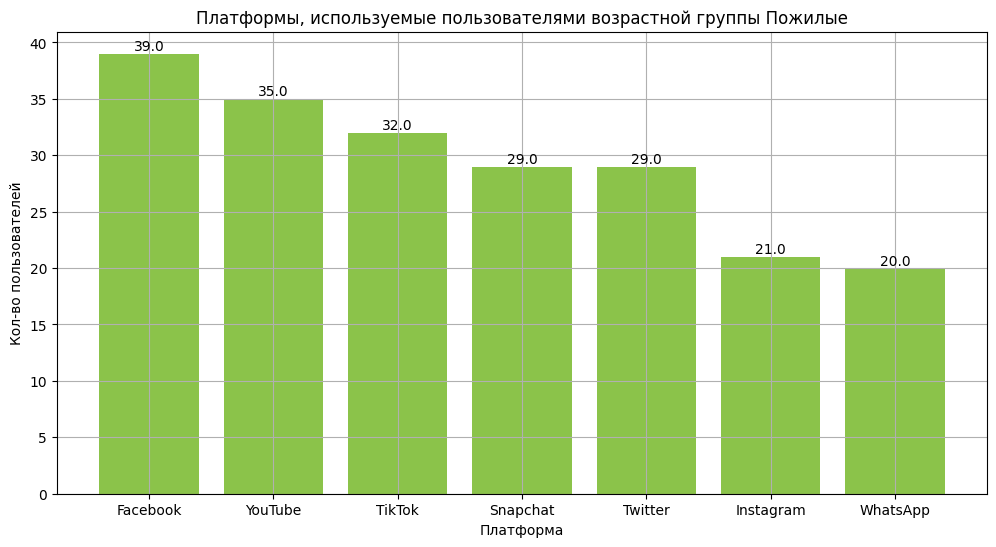

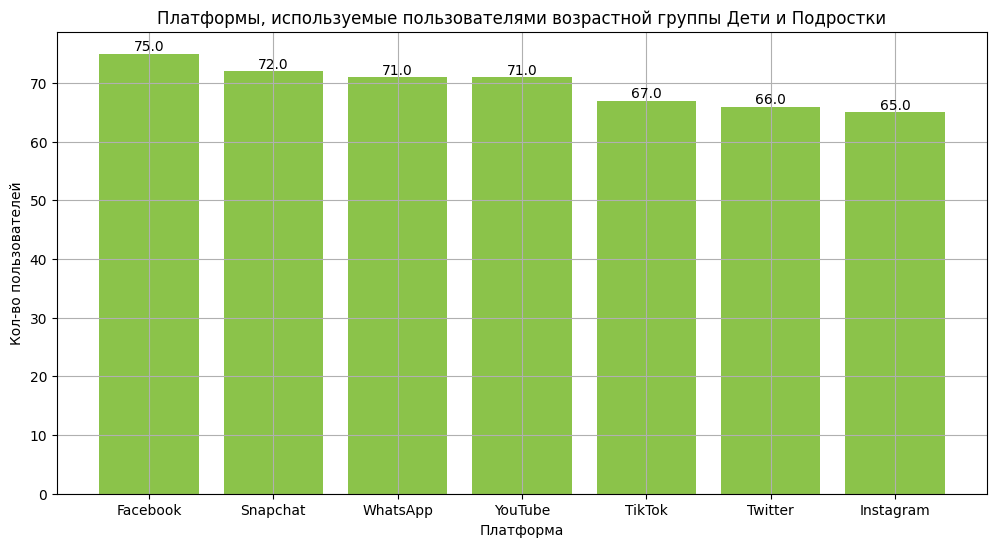

In [53]:
for age in df['age_segmentation'].unique():
    df_plot = df[df['age_segmentation'] == age].groupby('platform')['person_name'].count().reset_index().sort_values(by = 'person_name', ascending = False)

    plt.figure(figsize=(12,6))
    bars = plt.bar(df_plot['platform'], df_plot['person_name'], color = '#8BC34A')
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom',
             fontsize=10)
    plt.title(f'Платформы, используемые пользователями возрастной группы {age}')
    plt.xlabel(f'Платформа')
    plt.ylabel('Кол-во пользователей')
    plt.grid()
    plt.show()

Промежуточные итоги:

- Группа 'Взрослые' больше всего использует Snapchat (279 пользователей), меньше всего WhatsApp (247 пользователей). В целом разница в использовании приложений по количеству пользователей небольшая.
- Группа 'Молодежь' больше всего использует WhatsApp (362 пользователей), меньше всего Snapchat (307 пользователей ).
- Группа 'Пожилые' больше всего использует Facebook (39 пользователей), меньше всего WhatsApp (20 пользователей).
- Группы 'Дети и подростки' больше всего использует Facebook (75 пользователей), меньше всего Instagram (65 пользователей).

* Instagram, Facebook, WhatsApp (организаиця Meta) - запрещены на территории РФ, Snapchat - запрещен на территории РФ. 


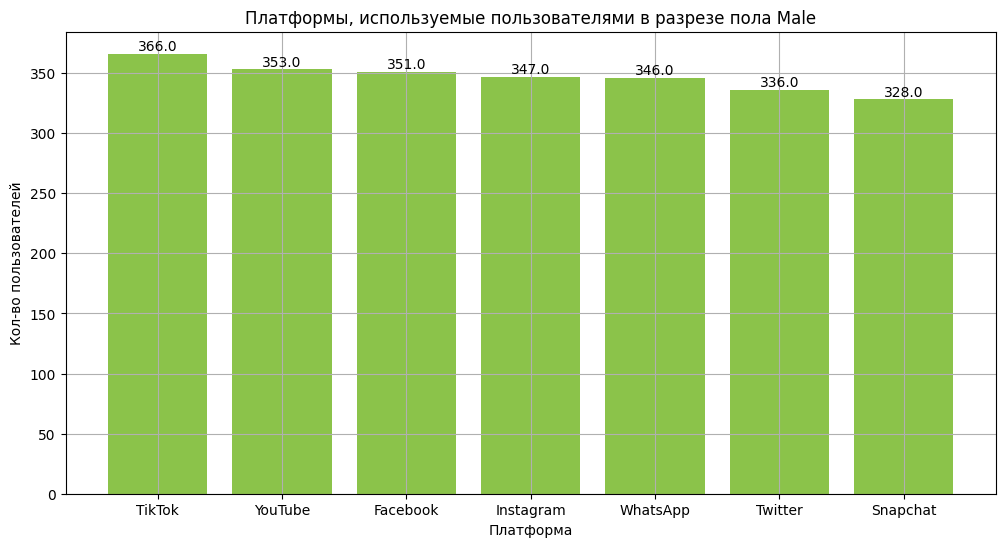

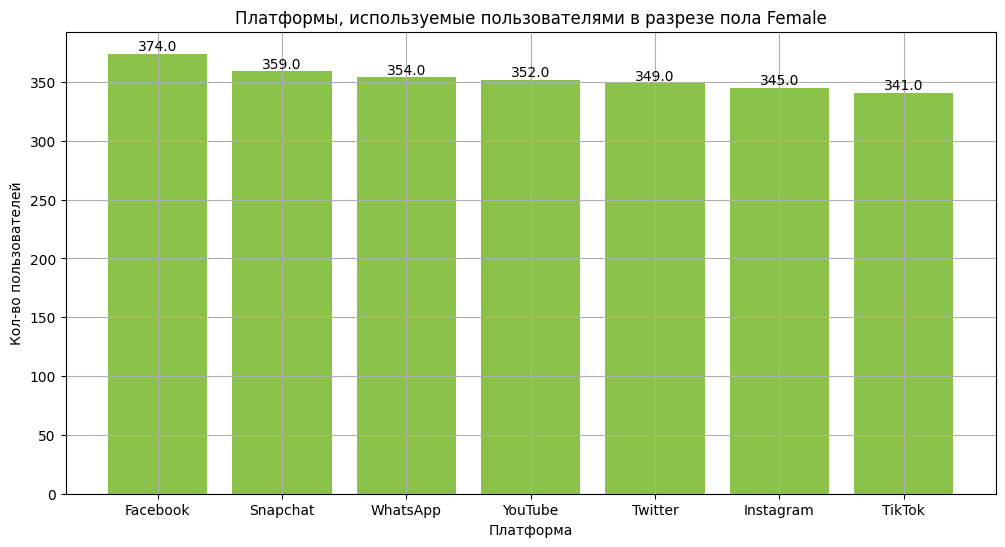

In [54]:
for gender in df['gender'].unique():
    df_plot = df[df['gender'] == gender].groupby('platform')['person_name'].count().reset_index().sort_values(by = 'person_name', ascending = False)

    plt.figure(figsize=(12,6))
    bars = plt.bar(df_plot['platform'], df_plot['person_name'], color = '#8BC34A')
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom',
             fontsize=10)
    plt.title(f'Платформы, используемые пользователями в разрезе пола {gender}')
    plt.xlabel(f'Платформа')
    plt.ylabel('Кол-во пользователей')
    plt.grid()
    plt.show()

Промежуточные итоги:
- Мужчины больше всего используют TikTok (366 пользователей), меньше всего Snapchat (328 пользователей). 
- Женщины больше всего используют Facebook (374 пользователя), меньше всего TikTok (341 пользователей).


* Instagram, Facebook, WhatsApp (организаиця Meta) - запрещены на территории РФ, Snapchat - запрещен на территории РФ.

Итоговые выводы по анаизу ментального здоровья пользователей и цифровым привычкам: 
- Больше всего гаджетами и социальными сетями пользуется молодежь, меньше всего пожилые люди. 
- Наибольшая физическая активность наблюдается у пожилых, наименьшая у молодежи. 
- Наиболее продолжительный сон у пожилых, наименее продолжительный сон у молодежи. 
- Наиболее высокий средний  уровень стресса у молодежи, наименее у пожилых. 
- Наиболее высокий средний  уровень тревоги у молодежи, наименее у пожилых. 
- Наиболее высокий средний  уровень настроения у пожилых, наименее у молодежи. 
- Наиболее высокое среднее  значение  количества позитивного опыта онлайн у молодежи, наименее у пожилых.
- Наиболее высокое среднее  значение  количества негативного опыта онлайн у молодежи, наименее у пожилых.
- В разрезе пола не было выявлено диспропорции в распределении экранного времени, времени в социальных сетях, времени физической активности, времени сна, уровня стресса, тревоги, настроения, количества позитивного и негативного опыта онлайн - все показатели по средним значениям распределены практически ровно пополам.
- Среди всех  пользователей наиболее популярное ментальное состояние - `Stressed` (у 4510 пользователя - 92.02% от общего количества пользователей), на втором месте `Healthy` (334 пользователя - 6.81%), на третьем месте ментальное состояние `At_Risk` (57 пользователей - 1.16%)У группы 'Взрослые' представлены все три характеристики ментального состояние: `Stressed` у 1574 пользователей, `Healthy` у 230 пользователей, ментальное состояние `At_Risk` у 57 пользователей. У 'Молодежи' представлено только состояние `Stressed` у 2348 пользователей.У 'Пожилых' представлено две характеристики ментального состояния: `Stressed` у 104 пользователей, `Healthy` у 101 пользователя. Практически ровно пополам. У 'Детей и Подростков' представлено только состояние `Stressed` у 487 пользователей. В разрезе пола распределение характеристик ментального здоровья соответсвует по сути распределению по пользователям в целом, самое распространенное и нераспространенное ментальное состояние совпадают. 
- Группа 'Взрослые' больше всего использует Snapchat (279 пользователей), меньше всего WhatsApp (247 пользователей). В целом разница в использовании приложений по количеству пользователей небольшая.
- Группа 'Молодежь' больше всего использует WhatsApp (362 пользователей), меньше всего Snapchat (307 пользователей ).
- Группа 'Пожилые' больше всего использует Facebook (39 пользователей), меньше всего WhatsApp (20 пользователей).
- Группы 'Дети и подростки' больше всего использует Facebook (75 пользователей), меньше всего Instagram (65 пользователей).
- Мужчины больше всего используют TikTok (366 пользователей), меньше всего Snapchat (328 пользователей). 
- Женщины больше всего используют Facebook (374 пользователя), меньше всего TikTok (341 пользователей).


* Instagram, Facebook, WhatsApp (организаиця Meta) - запрещены на территории РФ, Snapchat - запрещен на территории РФ.

## 3. Корреляционный анализ

Изучим корреляции важнейших признаков, характеризующих ментальное состояние пользователей и их цифровые привычки и сделаем соответствующие выводы. 

interval columns not set, guessing: ['age', 'daily_screen_time_min', 'social_media_time_min', 'negative_interactions_count', 'positive_interactions_count', 'sleep_hours', 'physical_activity_min', 'anxiety_level', 'stress_level', 'mood_level', 'sleep_min']


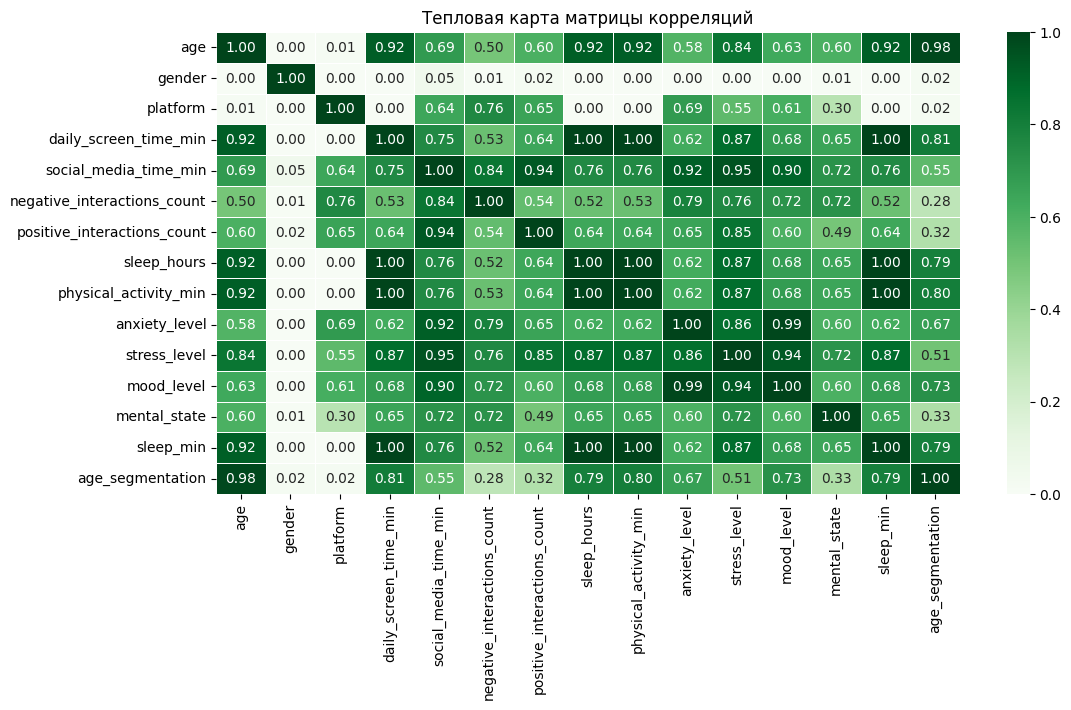

In [55]:
corr_columns = ['age', 'gender', 'platform',
       'daily_screen_time_min', 'social_media_time_min',
       'negative_interactions_count', 'positive_interactions_count',
       'sleep_hours', 'physical_activity_min', 'anxiety_level', 'stress_level',
       'mood_level', 'mental_state', 'sleep_min', 'age_segmentation']

corr_matrix = df[corr_columns].phik_matrix()

plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot = True, fmt='.2f', linewidths=0.5, cmap='Greens')

plt.title('Тепловая карта матрицы корреляций')
plt.show()


От 0 до 0.3 — слабая корреляция, то есть взаимосвязи практически нет. Что важно было узнать:

- Слабая корреляция между gender (пол) и практически всеми параметрами (0.00-0.05). Это означает, что пол практически не связан с цифровыми привычками, качество сна или психологическое состояние.
- Слабая корреляция между platform (платформа/устройство) и большинством параметров (0.00-0.30). Тип устройства почти не связан с уровнем стресса, тревоги или другими показателями.
- Слабая корреляция между age_segmentation и stress_level (0.51). Возрастные сегменты слабо коррелируют с уровнем стресса.

От 0.3 до 0.7 — умеренная корреляция: существует взаимосвязь, но она не очень сильная. Что важно было узнать:

- Умеренная корреляция между negative_interactions_count и age (0.50).
- Умеренная корреляция между positive_interactions_count и age (0.60).
- Умеренная корреляция между positive_interactions_count и platform (0.65). Количество позитивных взаимодействий умеренно связано с платформой, которую использует пользователей.
- Умеренная корреляция между anxiety_level, stress_level, mood_level и platform (0.55-0.69). Эмоциональное состояние усмеренно связано с платформой, используемой пользователем.
- Умеренная корреляция между anxiety_level, mood_level и daily_screen_time_min (0.62,0.68). Эмоциональное состояние усмеренно связано с экранным временем пользователя.

От 0.7 до 1.0 — сильная корреляция: Что важно было узнать:
- Сильная корреляция между social_media_time_min и mood_level (0.90). Время в соцсетях сильно влияет на настроение.
- Сильная корреляция между social_media_time_min и anxiety_level (0.92). Время в соцсетях сильно коррелирует с уровнем тревоги.
- Сильная корреляция между social_media_time_min и stress_level (0.95). Время в соцсетях коррелирует с уровнем стресса.
- Сильная корреляция между negative_interactions_count и platform (0.74). Количество негативных взаимодействий связано с платформой, которую использует пользователей.
- Сильная корреляция между positive_interactions_count и social_media_time_min (0.94). Положительные взаимодействия коррелируют с временем в соцсетях.
- Сильная корреляция между daily_screen_time_min и sleep_hours (1.00). Общее время у экрана и часы сна идеально коррелируют.
- Сильная корреляция между daily_screen_time_min и physical_activity_min (1.00). Время у экрана и физическая активность идеально коррелируют.
- Сильная корреляция между sleep_hours и physical_activity_min (1.00). Сон и физическая активность идеально коррелируют.

0 - нет корреляции. Что важно было узнать:

Практически нет корреляции между gender и всеми остальными параметрами (0.00-0.05). Пол не является значимым фактором в цифровых привычках и психологическом состоянии.

Нет корреляции между platform и большинством поведенческих параметров. Тип устройства не определяет поведенческие паттерны.

Важные инсайты и рекомендации:

- Сон, экранное время и физическая активность идеально коррелируют (1.00) - это указывает либо на:

1. Проблему в данных (дублирование переменных или ошибка измерения)
2. Жесткую поведенческую связь, где увеличение экранного времени автоматически снижает и сон, и физическую активность

- Социальные сети - ключевой драйвер психологического состояния:

1. Время в соцсетях сильно коррелирует с тревогой (0.92) и стрессом (0.95)
2. При этом влияет на настроение (0.90)

## Формирование итоговых выводов

Какая работа была проделана?

- Была проведена **предобработка данных**, в ходе которой выяснили важные фактф о данных: данные собирались с 1 января 2024 года по 16 ноября 2025 года.  Важно, что на этапе предобработки мы удалили из данных пользователей с `gender` `Other`, потерям ~2% данных. 
- Во время **анализа пользователей в разрезе возраста, пола, платформы** мы разделили пользователей на 4 категории: 1) 1-17 лет - дети и  подростки, 2) 18 - 29 лет - молодежь, 3) 30-59 лет - взрослые, 4) 60-70 лет - пожилые. Мы выяснили, что:
- Больше всего пользователей в сегменте молодежь - 47.9% (2348 чел.). Почти половина от всех пользователей. На втором месте взрослые - 38%, на третьем месте дети и подростки - 9.9%.Меньше всего пользователей в сегменте пожилые - 4.2% (205 чел.)
- Диспропорция в количестве пользователей в разрезе пола и платформы практически отсуствует. В каждой возрастной группе присуствует практически одинаковое количество мужчин и женщин (50/50).
- В ходе **анализа цифровых привычек и ментального здоровья** мы выяснили, что:
- Больше всего гаджетами и социальными сетями пользуется молодежь, меньше всего пожилые люди. 
- Наибольшая физическая активность наблюдается у пожилых, наименьшая у молодежи. 
- Наиболее продолжительный сон у пожилых, наименее продолжительный сон у молодежи. 
- Наиболее высокий средний  уровень стресса и тревоги у молодежи, наименее у пожилых. 
- Наиболее высокий средний  уровень настроения у пожилых, наименее у молодежи. 
- Наиболее высокое среднее  значение  количества позитивного опыта онлайн у молодежи, наименее у пожилых.
- Наиболее высокое среднее  значение  количества негативного опыта онлайн у молодежи, наименее у пожилых.
- В разрезе пола не было выявлено диспропорции в распределении всех характеристик ментального здоровья и цифровых привычек. 
- Среди всех  пользователей наиболее популярное ментальное состояние - `Stressed` (92.02% пользоателей ), на втором месте `Healthy` (6.81% пользователей), на третьем месте ментальное состояние `At_Risk` (1.16% пользователей). У группы 'Взрослые' представлены все три характеристики ментального состояние: `Stressed` у 1574 пользователей, `Healthy` у 230 пользователей, ментальное состояние `At_Risk` у 57 пользователей. У 'Молодежи' представлено только состояние `Stressed` у 2348 пользователей. У 'Пожилых' представлено две характеристики ментального состояния: `Stressed` у 104 пользователей, `Healthy` у 101 пользователя. Практически ровно пополам. У 'Детей и Подростков' представлено только состояние `Stressed` у 487 пользователей. В разрезе пола распределение характеристик ментального здоровья соответсвует по сути распределению по пользователям в целом, самое распространенное и нераспространенное ментальное состояние совпадают. 
- Группа 'Взрослые' больше всего использует Snapchat (279 пользователей), меньше всего WhatsApp (247 пользователей). В целом разница в использовании приложений по количеству пользователей небольшая.
- Группа 'Молодежь' больше всего использует WhatsApp (362 пользователей), меньше всего Snapchat (307 пользователей ).
- Группа 'Пожилые' больше всего использует Facebook (39 пользователей), меньше всего WhatsApp (20 пользователей).
- Группы 'Дети и подростки' больше всего использует Facebook (75 пользователей), меньше всего Instagram (65 пользователей).
- Мужчины больше всего используют TikTok (366 пользователей), меньше всего Snapchat (328 пользователей). 
- Женщины больше всего используют Facebook (374 пользователя), меньше всего TikTok (341 пользователей).
- В ходе **корреляционного анализа** была выявлена сильная и умеренная корреляции  между характеристиками сна, физ. активности, ментального состояния и временем, провденным за гаджетами и в социальных сетях. Это, конечно, не свидетельтсвует о причинно-следственной связи, но дает повод задуматься над ее исследованием. 

Рекомендации для компании, проводившей анализ:
- Стоит предоставлять более развернутые описания данных, для этого нужно собирать качественные ланные изначально. Не было описано в начале, что имеется в вилу под физической активностью и при анализе это выявить не удалось. Стоит более детально поработать над тем, насколько точно пользователи характеризуют свое ментальное состояние и связывают ли они его только со своей онлайн активностью или другими жизненными проблемами. Для этого можно, например, сделать опрос анонимный, но добавить колонки с описанием жизненных трудностей, которые сейчас есть в жизни людей, чтобы аналитики могли проследить ментальное состояние людей, пользующихся соц сетями, без особых проблем жизни и с ними. ТАкже стоит заранее делать сегментацию по возрасту, чтобы объединять людей в группы по возрасту.

Рекомендации для пользователей:

Социальные сети, гаджеты и Интернет связан с вашим настроением, уровнем стресса и тревоги. Ваше ментальное состояние связано с количсетвом сна и физической активностью. Попробуйте сократить на определенный период время за экраном и мессенджерах, прогуляйтесь или поспите лишний час и сравните свое состояние до/после, вам наверняка станет лучше)